<a href="https://colab.research.google.com/github/JoaoCioffi/Kagglin/blob/main/StarWars/Star_Wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Database for Star Wars Analysis
---

> https://www.kaggle.com/jsphyg/star-wars

```
          _                                      
  ___| |_ __ _ _ __  __      ____ _ _ __ ___ 
 / __| __/ _` | '__| \ \ /\ / / _` | '__/ __|
 \__ \ || (_| | |     \ V  V / (_| | |  \__ \
 |___/\__\__,_|_|      \_/\_/ \__,_|_|  |___/
George Lucas - Jedi - Death Star - R2-D2 - C-3PO - Yoda - Darth Vader


     .    .     .            +         .         .                 .  .
      .                 .                   .               .
              .    ,,o         .                  __.o+.
    .            od8^                  .      oo888888P^b           .
       .       ,".o'      .     .             `b^'""`b -`b   .
             ,'.'o'             .   .          t. = -`b -`t.    .
            ; d o' .        ___          _.--.. 8  -  `b  =`b
        .  dooo8<       .o:':__;o.     ,;;o88%%8bb - = `b  =`b.    .
    .     |^88^88=. .,x88/::/ | \\`;;;;;;d%%%%%88%88888/%x88888
          :-88=88%%L8`%`|::|_>-<_||%;;%;8%%=;:::=%8;;\%%%%\8888
      .   |=88 88%%|HHHH|::| >-< |||;%;;8%%=;:::=%8;;;%%%%+|]88        .
          | 88-88%%LL.%.%b::Y_|_Y/%|;;;;`%8%%oo88%:o%.;;;;+|]88  .
          Yx88o88^^'"`^^%8boooood..-\H_Hd%P%%88%P^%%^'\;;;/%%88
         . `"\^\          ~"""""'      d%P """^" ;   = `+' - P
   .        `.`.b   .                :<%%>  .   :  -   d' - P      . .
              .`.b     .        .    `788      ,'-  = d' =.'
       .       ``.b.                           :..-  :'  P
            .   `q.>b         .               `^^^:::::,'       .
    LS            ""^^               .                     .
  .                                           .               .       .
    .         .          .                 .        +         .
                    Sienar Fleet Systems' TIE Bomber
                           Light Space Bomber

```




Content:

Five .csv files. Some can be joined -- for example, characters to their home planets.

- 87 characters
- 61 planets
- 37 species
- 39 vehicles
- 37 starships

Acknowledgements:

This data was gathered using the Star Wars API that is no longer available. The origin of the data is The Star Wars Wiki: https://starwars.fandom.com/wiki.

> Main Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1- Main Functions (Pipeline)

## a) Printable Functions

### (i) DF Shape

In [ ]:
def shape(df):
  # DataFrame shape
  print('-='*30)
  print('|\t\t\t| DF Shape |\t\t\t')
  print('|')
  print(f'|  Rows: {df.shape[0]}\n|   X\n|  Columns: {df.shape[1]}')
  print('-='*30)
  return None

### (ii) DF info

In [ ]:
def info(df):
  print(df.info(verbose=True))
  return None

### (iii) Nulls Quantity

In [ ]:
def nulls_qtd(df):
  print(df.isna().sum())
  return None

### (iv) Data Description

In [ ]:
def describe(df, perc, drop_list = None):
  if drop_list == None:
    df.select_dtypes(include='number').describe(percentiles = perc)
  else:
    df.select_dtypes(include='number').drop(drop_list, axis=1).describe(percentiles = perc)
  return None

## b) Transformable Functions

### (i) Changing Columns Dtype

In [ ]:
# Changes the variable type
def change_type(df, feature, ast = object):
  """
  df: Pandas DataFrame to be modified
  feature: a list or tuple of columns to be modified
  ast: set column astype (if not declared, automatically it will be setted as an object); must be a list or a tuple
  """
  try:
    len(feature) > 1
    len(ast) > 1
  except:
    print('function developed for multiple features changes.. You must input a list of each one')
    

  assert len(feature) == len(ast)

  for f, a in zip(feature, ast):
    f = str(f)
    a = str(a)
    df[f] = df[f].astype(a)
  return df

### (ii) Selecting DF columns

In [ ]:
def select_columns(df, columns_names_list):
  df_new = df[columns_names_list]
  return df_new

### (iii) Splitting data (train and test)

In [ ]:
def split_train_test(X, y, perc = 0.2):
  """
  X: x's variables
  y: target variable (system response)
  perc: test data percentage (decimal value; default = 0.2 = 20% of data)
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # Resets all DFs indexes
  X_train.reset_index(drop = True, inplace = True)
  X_test.reset_index(drop = True, inplace = True)
  y_train.reset_index(drop = True, inplace = True)
  y_test.reset_index(drop = True, inplace = True)

  return X_train, X_test, y_train, y_test

## c) Mathematical and Statistics Functions

### (i) Data Scaling

In [ ]:
# Criar a função para o escalonamento dos dados
def feat_scale(X):

  # Calcular a média de todas as variáveis
  mu = np.mean(X, axis = 0)

  # Calcular o devio padrão de todas as variáveis
  sigma = np.std(X, axis=0, ddof=1) # ddof=1 calcula o desvio padrão amostral

  # Fazer os escalonamento das variáveis
  xNorm = (X - mu)/sigma

  return xNorm

### (ii) OLS Formula

In [ ]:
def ols_formula(df, dependent_var, *excluded_rows):

  # Listar o nome das colunas do dataframe
  dfCols = list(df.columns.values)

  # Remover a variável dependente
  dfCols.remove(dependent_var)

  # Remover as variáveis excluídas
  for col in excluded_rows:
    dfCols.remove(col)

  # Retornar a fórmula
  return dependent_var + ' ~ ' + ' + '.join(dfCols)

### (iii) Gradient-Descent Formulas

> Loss Function

In [ ]:
def funcao_perda(X, y, beta):

  """
  X é a matriz com os regressores (m x n).
  y é a série com a resposta (1 x m).
  beta é a série dos parâmetros (1 x n).
  """

  # Previsão da resposta
  pred = X.dot(beta) #-> produto escalar

  # Calcular os erros de previsão
  res = np.subtract(pred, y.squeeze())

  # Calcular o quadrado dos erros
  sqrRes = np.square(res)

  # Calcular a perda
  perda = 1/(2*m) * np.sum(sqrRes)

  return perda

> Grad-Desc

In [ ]:
def grad_des(X, y, beta, alpha, itera):

  """
  X é a matriz dos regressores (m x n).
  y é a série da resposta (1 x m).
  beta é a série dos valores iniciais dos parâmetros (1 x n).
  alpha é a taxa de aprendizagem ou learning rate (escalar).
  itera é o número de iterações do algoritmo.

  __________________________________________
  Resultados

  beta é a série com os valores finais dos parâmetros.
  hperda é a série histórica das perdas.

  """

  # Inicializa a série do histórico de perdas
  hPerda = np.zeros(itera)

  for i in range(itera):

    # Calcula as previsões com os valores atuais dos parâmetros
    pred = X.dot(beta)

    # Calcula os resíduos da previsão
    res = np.subtract(pred, y.squeeze())

    # Calcula o incremento / decremento no valor dos betas - derivada parcial da função perda
    sumDelta = (alpha / m) * X.transpose().dot(res)

    # Atualizar os valores dos betas do modelo
    beta = beta - sumDelta

    #Calcula a nova perda com os novos valores dos betas
    hPerda[i] = funcao_perda(X, y, beta)

  return beta, hPerda, sumDelta


# 2- Exploratory Data Analysis (EDA)

## a) Characters

### (i) Loading Dataset (raw)

In [ ]:
url_chars = 'https://raw.githubusercontent.com/JoaoCioffi/Kagglin/main/StarWars/characters.csv'
df_characters_raw = pd.read_csv(url_chars, sep=';')
df_characters_raw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19 BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112 BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,white_blue,red,33 BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,NaN,white,yellow,41.9 BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19 BBY,female,Alderaan,Human


In [ ]:
df_characters_raw.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 87
|   X
|  Columns: 10
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### (ii) Initial Analysis: Nulls, Dtypes and Data Distribution

---
#### Metadata: Raw Data
---

In [ ]:
Metadata_characters_raw = pd.DataFrame({ 'Explicação':['Nome do personagem',
                                                       'Altura [cm]',
                                                       'Massa [kg]',
                                                       'Coloração do Cabelo',
                                                       'Pigmentação da pele',
                                                       'Coloração dos olhos',
                                                       'Data de Nascimento',
                                                       'Gênero',
                                                       'Planeta de origem',
                                                       'Espécie'],
                                         'Tipo da Variável' : list(df_characters_raw.dtypes.values),
                                         'Total de Registros Únicos': list(df_characters_raw.nunique()),
                                         'Total de Registros Nulos (NaN)' : list(df_characters_raw.isna().sum()),
                                         'Percentual de Registros Nulos (NaN)' : round(((df_characters_raw.isna().sum()/len(df_characters_raw)) * 100),4),
                                         'Tipos Encontrados' : ['-','-','-',str(list(df_characters_raw.groupby(by='hair_color').count().index)),
                                                                str(list(df_characters_raw.groupby(by='skin_color').count().index)),str(list(df_characters_raw.groupby(by='eye_color').count().index)),
                                                                '-', str(list(df_characters_raw.groupby(by='gender').count().index)),str(list(df_characters_raw.groupby(by='homeworld').count().index)),
                                                                str(list(df_characters_raw.groupby(by='species').count().index))] })
Metadata_characters_raw

,Explicação,Tipo da Variável,Total de Registros Únicos,Total de Registros Nulos (NaN),Percentual de Registros Nulos (NaN),Tipos Encontrados
name,Nome do personagem,object,87,0,0.0000,-
height,Altura [cm],float64,45,6,6.8966,-
mass,Massa [kg],float64,38,28,32.1839,-
hair_color,Coloração do Cabelo,object,10,43,49.4253,"['auburn', 'auburn_ grey', 'auburn_white', 'bl..."
skin_color,Pigmentação da pele,object,29,3,3.4483,"['blue', 'blue_grey', 'brown', 'brown mottle',..."
eye_color,Coloração dos olhos,object,14,3,3.4483,"['black', 'blue', 'blue-gray', 'brown', 'dark'..."
birth_year,Data de Nascimento,object,36,44,50.5747,-
gender,Gênero,object,3,5,5.7471,"['female', 'hermaphrodite', 'male']"
homeworld,Planeta de origem,object,48,10,11.4943,"['Alderaan', 'Aleen Minor', 'Bespin', 'Bestine..."
species,Espécie,object,37,5,5.7471,"['Aleena', 'Besalisk', 'Cerean', 'Chagrian', '..."


---
#### Dtypes
---

Como podemos observar a partir do Metadata, algumas variáveis apresentam-se no formato de 'pandas object'. Devemos ter variáveis numéricas no formato 'int' ou 'float' e as categóricas como sendo do tipo 'string' ou 'category'

In [ ]:
df_characters_raw.pipe(change_type, ('name', 'hair_color', 'skin_color', 'eye_color',
                                     'birth_year', 'gender', 'homeworld', 'species'),
                                    ('string','string', 'string', 'string',
                                     'string', 'string', 'string', 'string'))

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19 BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,<NA>,gold,yellow,112 BBY,<NA>,Tatooine,Droid
2,R2-D2,96.0,32.0,<NA>,white_blue,red,33 BBY,<NA>,Naboo,Droid
3,Darth Vader,202.0,136.0,<NA>,white,yellow,41.9 BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19 BBY,female,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,<NA>,female,<NA>,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,<NA>,male,<NA>,Human
84,BB8,NaN,NaN,<NA>,<NA>,black,<NA>,<NA>,<NA>,Droid
85,Captain Phasma,NaN,NaN,<NA>,<NA>,<NA>,<NA>,female,<NA>,<NA>


In [ ]:
df_characters_raw.dtypes # confirmando a alteração

name           string
height        float64
mass          float64
hair_color     string
skin_color     string
eye_color      string
birth_year     string
gender         string
homeworld      string
species        string
dtype: object

---
#### Nulls
---

A primeira etapa é tentar entender a origem do valor nulo:

- Missing Completely at Random (MCAR): são nulos que independem de outras variáveis e deles mesmos. Ex: dados perdidos de forma acidental - Neste caso temos apenas valores MCAR, já que a base de dados foi carregada diretamente da url e também nenhum campo foi gerado a partir de outro (logo, são independentes entre si e deles mesmos);
- Missing at Random (MAR): são nulos que dependem de outras variáveis, mas não dependem deles mesmos. Ex: sensor de temperatura, perda de pacotes devido à queda de conexão, dentre outros;
- Not Missing at Random (NMAR): valores nulos que dependem deles mesmos. Ex: sensor de temperatura não funciona abaixo de 5°C;

Como podemos observar, algumas Features apresentam muitos valores faltantes (podendo ser, inclusive, superior à metade dos dados). Neste caso não podemos simplesmente fazer um dropna() das linhas sem registro, já que a massa de dados será consideravelmente afetada. Devemos analisar o contexto como um todo para entender qual o melhor método de tratamento desses valores.

In [ ]:
df_characters_raw.pipe(nulls_qtd)

name           0
height         6
mass          28
hair_color    43
skin_color     3
eye_color      3
birth_year    44
gender         5
homeworld     10
species        5
dtype: int64


> Variáveis Numéricas:
>> Por se tratarem de variáveis numéricas, iremos substituir os nulos pela média dos valores destas categorias. Entretanto, sabemos também que cada indivíduo tem sua designação por espécie, então a melhor abordagem seria calcular a média de altura e peso por espécie e somente então fazer a substituição dos valores faltantes

>> *(Obs: O motivo de não realizarmos a média por 'homeworld' é que podemos ter uma espécie provinda de um planeta nativo 'A' que esteja distribuída em outro planeta 'B'. Portanto, para evitar criar vieses nas análises manteremos a média por espécie)*

In [ ]:
df_char_grouped_species = df_characters_raw.groupby(by = 'species').agg({'height':'mean', 'mass':'mean'})
df_char_grouped_species.head()

,height,mass
species,,
Aleena,79.0,15.0
Besalisk,198.0,102.0
Cerean,198.0,82.0
Chagrian,196.0,NaN
Clawdite,168.0,55.0


>> Agora temos para cada espécie os valores médios de altura e peso. Entretanto podemos perceber que ainda existem campos nulos (isso é explicado quando se tem um único registro para uma determinada espécie e este já encontra-se nulo - neste caso não é possível determinar a média). Como não temos informações para este tipo, iremos então atribuir a média geral

In [ ]:
height_mean = np.mean(df_char_grouped_species.height)
mass_mean = np.mean(df_char_grouped_species.mass)

df_char_grouped_species['height'] = df_char_grouped_species.height.fillna(height_mean)
df_char_grouped_species['mass'] = df_char_grouped_species.mass.fillna(mass_mean)
print(df_char_grouped_species.isna().sum()) # confirmando a alteração
df_char_grouped_species.head()

height    0
mass      0
dtype: int64


,height,mass
species,,
Aleena,79.0,15.000000
Besalisk,198.0,102.000000
Cerean,198.0,82.000000
Chagrian,196.0,68.967413
Clawdite,168.0,55.000000


In [ ]:
na_indexes_mass = list(df_characters_raw.loc[pd.isna(df_characters_raw["mass"]), :].index)
na_indexes_height = list(df_characters_raw.loc[pd.isna(df_characters_raw["height"]), :].index)

print('Posições econtradas (index) para valores nulos:')
print('Mass: ', na_indexes_mass)
print('Height', na_indexes_height)

Posições econtradas (index) para valores nulos:
Mass:  [11, 26, 27, 32, 35, 36, 37, 39, 40, 42, 45, 50, 52, 53, 55, 57, 58, 62, 64, 69, 70, 72, 74, 81, 82, 83, 84, 85]
Height [27, 81, 82, 83, 84, 85]


In [ ]:
print(df_char_grouped_species.iloc[lambda s: s.index == 'Human']) #DF contendo todos os valores que são 'Human' pelo index
print('-'*30)
print(df_char_grouped_species.iloc[lambda s: s.index == 'Human'].mass) #acesso ao campo 'mass'
print('Massa = ', float(df_char_grouped_species.iloc[lambda s: s.index == 'Human'].mass), 'kg')
print('-'*30)
print(df_char_grouped_species.iloc[lambda s: s.index == 'Human'].height) #acesso ao campo 'height'
print('Altura = ', float(df_char_grouped_species.iloc[lambda s: s.index == 'Human'].height), 'cm')

print('\n')
print('/'*50)
print('\n')

print(df_characters_raw.iloc[11]) #localização por índice (geral)
print('-'*30)
print('Nome: ', df_characters_raw.name.iloc[11]) #localização por índice (campo específico)

             height       mass
species                       
Human    176.645161  82.781818
------------------------------
species
Human    82.781818
Name: mass, dtype: float64
Massa =  82.78181818181818 kg
------------------------------
species
Human    176.645161
Name: height, dtype: float64
Altura =  176.6451612903226 cm


//////////////////////////////////////////////////


name          Wilhuff Tarkin
height                   180
mass                     NaN
hair_color      auburn_ grey
skin_color              fair
eye_color               blue
birth_year            64 BBY
gender                  male
homeworld             Eriadu
species                Human
Name: 11, dtype: object
------------------------------
Nome:  Wilhuff Tarkin


In [ ]:
# Substituindo os nulos do DF original pelos valores médios encontrados:
for m in range(0, len(df_characters_raw.mass)):
  if df_characters_raw.mass[m] == np.nan:
    df_characters_raw.mass[m] = float(df_char_grouped_species.iloc[lambda s: s.index == df_characters_raw.species[m]].mass)


df_characters_raw.mass.isna().sum()

28

>> Uma segunda abordagem seria bem mais simples: ao invés de localizar os nulos por índices em cada campo, podemos com uma única linha agregar as transformações por média e em seguida aplicar o fillna() do Pandas:
>>> |------ ***Variável 'mass'*** ------|

In [ ]:
df_characters_raw.groupby(by = 'species')['mass'].transform('mean')

0     82.781818
1     69.750000
2     69.750000
3     82.781818
4     82.781818
        ...    
82    82.781818
83    82.781818
84    69.750000
85          NaN
86    82.781818
Name: mass, Length: 87, dtype: float64

In [ ]:
df_characters_raw.mass = df_characters_raw.mass.fillna(df_characters_raw.groupby(by = 'species')['mass'].transform('mean')) #Agrupa por espécie e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_characters_raw.mass = df_characters_raw.mass.fillna(mass_mean) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_characters_raw.mass.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'height'*** ------|

In [ ]:
df_characters_raw.height = df_characters_raw.height.fillna(df_characters_raw.groupby(by = 'species')['height'].transform('mean')) #Agrupa por espécie e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_characters_raw.height = df_characters_raw.height.fillna(height_mean) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_characters_raw.height.isna().sum() # confirma os resíduos de nulos

0

> Variáveis Categóricas:
>> Para *'hair_color', 'skin_color', 'eye_color', 'gender' e 'species'* poderíamos aplicar duas abordagens: (1) preencher os nulos com a moda de cada categoria (o critério de agrupar por espécie aqui também é bastante válido), ou (2) criar uma nova variação desta categoria como sendo 'indefinido', 'não-listado', ou algo do tipo. O grande problema de substituir pela moda é que poderíamos estar enviesando a categoria (isto é, estaríamos aumentando ainda mais a frequência do valor tido como moda).
Portanto iremos apenas criar uma nova categoria como 'undefined' para cada uma delas. Não é necessario o tratamento por agrupamento, podemos fazer diretamente pelo fillna()

>>> |------ ***Variável 'hair_color'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.hair_color.isna().sum())
df_characters_raw.hair_color = df_characters_raw.hair_color.fillna('undefined_hair_color')
print('Total de nulos: ', df_characters_raw.hair_color.isna().sum()) # confirmando a alteração

Total de nulos:  43
Total de nulos:  0


>>> |------ ***Variável 'skin_color'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.skin_color.isna().sum())
df_characters_raw.skin_color = df_characters_raw.skin_color.fillna('undefined_skin_color')
print('Total de nulos: ', df_characters_raw.skin_color.isna().sum()) # confirmando a alteração

Total de nulos:  3
Total de nulos:  0


>>> |------ ***Variável 'eye_color'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.eye_color.isna().sum())
df_characters_raw.eye_color = df_characters_raw.eye_color.fillna('undefined_eye_color')
print('Total de nulos: ', df_characters_raw.eye_color.isna().sum()) # confirmando a alteração

Total de nulos:  3
Total de nulos:  0


>>> |------ ***Variável 'gender'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.gender.isna().sum())
df_characters_raw.gender = df_characters_raw.gender.fillna('undefined_gender')
print('Total de nulos: ', df_characters_raw.gender.isna().sum()) # confirmando a alteração

Total de nulos:  5
Total de nulos:  0


>>> |------ ***Variável 'homeworld'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.homeworld.isna().sum())
df_characters_raw.homeworld = df_characters_raw.homeworld.fillna('undefined_origin')
print('Total de nulos: ', df_characters_raw.homeworld.isna().sum()) # confirmando a alteração

Total de nulos:  10
Total de nulos:  0


>>> |------ ***Variável 'species'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_characters_raw.species.isna().sum())
df_characters_raw.species = df_characters_raw.species.fillna('undefined_species')
print('Total de nulos: ', df_characters_raw.species.isna().sum()) # confirmando a alteração

Total de nulos:  5
Total de nulos:  0


>> Para *'birth_year'* poderíamos aplicar as mesmas duas abordagens. Entretanto antes devemos remover a unidade 'BBY' (previamente definido como string) e então converter a coluna para o formato numérico. Após feito isso iremos pegar o ano de nascimento médio por 'homeworld' (já que automaticamente ele seleciona os registros essencialmente nativos, não tendo problemas de viés como tínhamos para outras variáveis) e atribuir aos nulos

In [ ]:
df_characters_raw.birth_year # relembrando os valores contidos nessa Feature

0       19 BBY
1      112 BBY
2       33 BBY
3     41.9 BBY
4       19 BBY
        ...   
82        <NA>
83        <NA>
84        <NA>
85        <NA>
86      46 BBY
Name: birth_year, Length: 87, dtype: string

In [ ]:
list_of_values_str = []
for x in df_characters_raw.birth_year.values:
  list_of_values_str.append(str(x).split()[0])

list_of_values_num = []
for s in list_of_values_str:
  if s != '<NA>':
    list_of_values_num.append(float(s))
  else:
    list_of_values_num.append(np.nan)

df_characters_raw.birth_year = list_of_values_num

In [ ]:
df_char_grouped_homeworld = df_characters_raw.groupby(by = 'homeworld').agg({'birth_year':'mean'})
df_char_grouped_homeworld.head()

,birth_year
homeworld,
Alderaan,43.0
Aleen Minor,NaN
Bespin,37.0
Bestine_IV,NaN
Cato Neimoidia,NaN


>> Agora temos para cada homeworld o valor médio do ano de nascimento. Entretanto podemos perceber que ainda existem campos nulos. Como não temos informações para este tipo, iremos então atribuir a média geral


In [ ]:
year_mean = float(int(np.mean(df_char_grouped_homeworld.birth_year)))
year_mean

89.0

In [ ]:
df_char_grouped_homeworld['birth_year'] = df_char_grouped_homeworld.birth_year.fillna(year_mean)
print(df_char_grouped_homeworld.isna().sum()) # confirmando a alteração
df_char_grouped_homeworld['birth_year'] = df_char_grouped_homeworld['birth_year'].astype('int64')
df_char_grouped_homeworld.head()

birth_year    0
dtype: int64


,birth_year
homeworld,
Alderaan,43
Aleen Minor,89
Bespin,37
Bestine_IV,89
Cato Neimoidia,89


In [ ]:
df_characters_raw.birth_year = df_characters_raw.birth_year.fillna(df_characters_raw.groupby(by = 'homeworld')['birth_year'].transform('mean')) #Agrupa por espécie e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_characters_raw.birth_year = df_characters_raw.birth_year.fillna(int(year_mean)) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_characters_raw['birth_year'] = df_characters_raw['birth_year'].astype('int64')
df_characters_raw.birth_year.isna().sum() # confirma os resíduos de nulos

0

---
#### Feature Extraction: Algumas visualizações interessantes
---

> Distribuição da altura média e do peso médio por espécie:

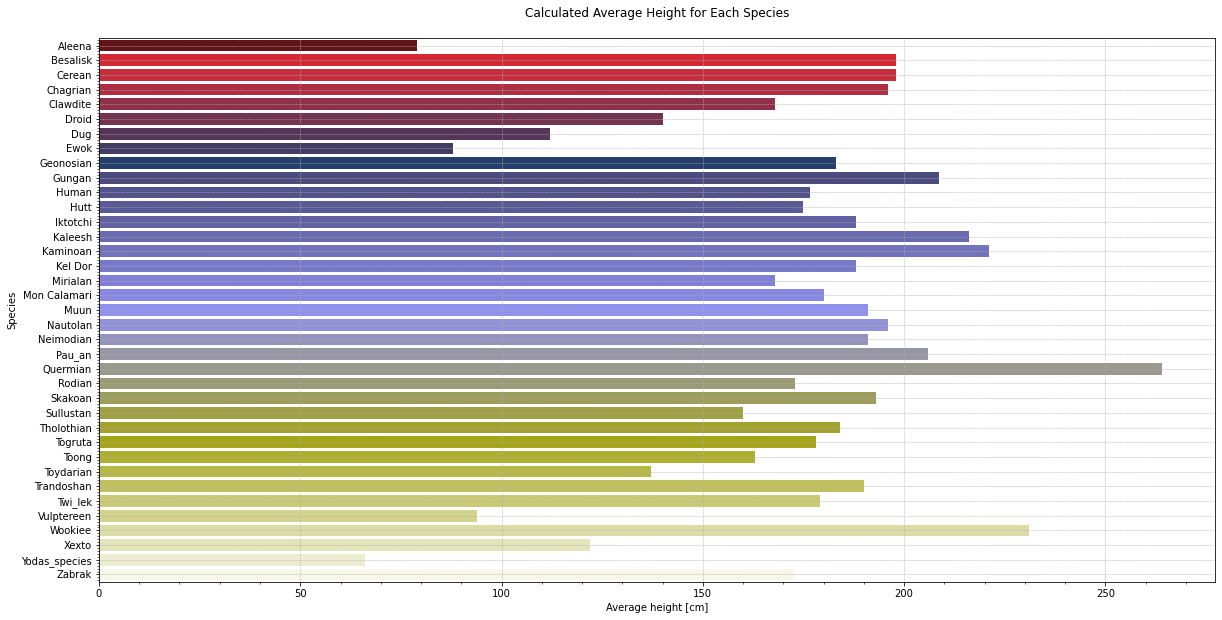

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
plt.title('Calculated Average Height for Each Species\n')
ax = sns.barplot(y=df_char_grouped_species.index, x=df_char_grouped_species.height, palette='gist_stern', alpha=1)
ax.set(xlabel='Average height [cm]',ylabel='Species')
plt.grid(True, linestyle='--', linewidth=0.5, which='major')
plt.minorticks_on()
plt.show()

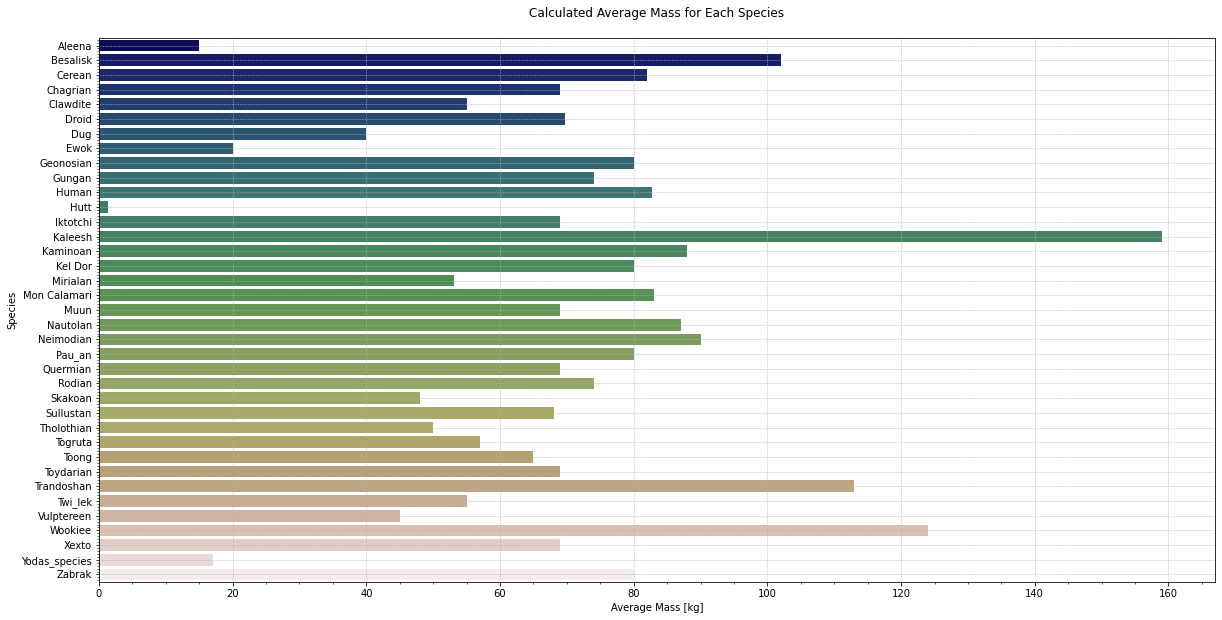

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
plt.title('Calculated Average Mass for Each Species\n')
ax = sns.barplot(y=df_char_grouped_species.index, x=df_char_grouped_species.mass, palette='gist_earth', alpha=1)
ax.set(xlabel='Average Mass [kg]',ylabel='Species')
plt.grid(True, linestyle='--', linewidth=0.5, which='major')
plt.minorticks_on()
plt.show()

> Distribuição de Indivíduos por Espécie Matizado por Gênero


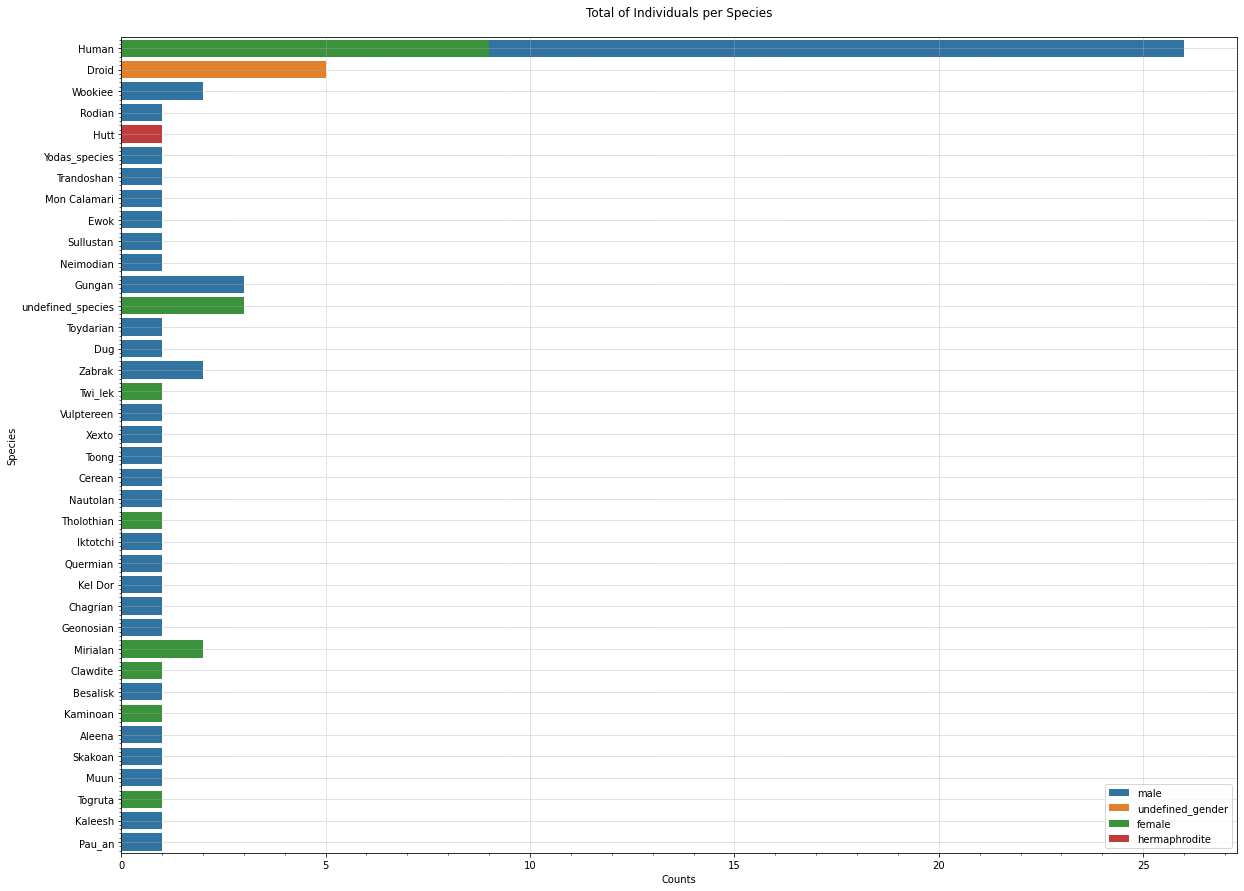

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Total of Individuals per Species\n')
sns.countplot(y='species',data=df_characters_raw,hue='gender',dodge=False)
plt.grid(True, linestyle='--', linewidth=0.5, which='major')
plt.minorticks_on()
plt.xlabel('Counts')
plt.ylabel('Species')
plt.legend(loc = 'lower right')

> Top Five: Os 5 personagens mais altos e os 5 mais baixos de Starwars

In [ ]:
top5_tallest = df_characters_raw.nlargest(5, 'height').sort_values(by='height', ascending=False)
top5_tallest

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
53,Yarael Poof,264.0,68.967413,undefined_hair_color,white,yellow,89,male,Quermia,Quermian
77,Tarfful,234.0,136.000000,brown,brown,blue,200,male,Kashyyyk,Wookiee
68,Lama Su,229.0,88.000000,undefined_hair_color,grey,black,31,male,Kamino,Kaminoan
12,Chewbacca,228.0,112.000000,brown,undefined_skin_color,blue,200,male,Kashyyyk,Wookiee
34,Roos Tarpals,224.0,82.000000,undefined_hair_color,grey,orange,55,male,Naboo,Gungan


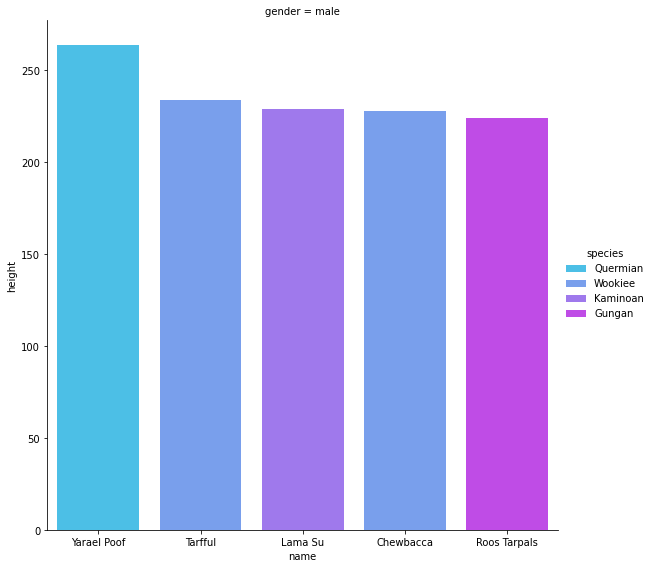

In [ ]:
sns.catplot(x="name", y="height",
                hue="species", col="gender",
                data=top5_tallest, kind="bar", palette="cool", dodge=False,
                height=8, aspect=1);

In [ ]:
top5_smallest = df_characters_raw.nsmallest(5, 'height').sort_values(by='height', ascending=False)
top5_smallest

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
2,R2-D2,96.0,32.0,undefined_hair_color,white_blue,red,33,undefined_gender,Naboo,Droid
44,Dud Bolt,94.0,45.0,undefined_hair_color,blue_grey,yellow,89,male,Vulpter,Vulptereen
28,Wicket Systri Warrick,88.0,20.0,brown,brown,brown,8,male,Endor,Ewok
71,Ratts Tyerell,79.0,15.0,undefined_hair_color,grey_blue,undefined_eye_color,89,male,Aleen Minor,Aleena
18,Yoda,66.0,17.0,white,green,brown,896,male,undefined_origin,Yodas_species


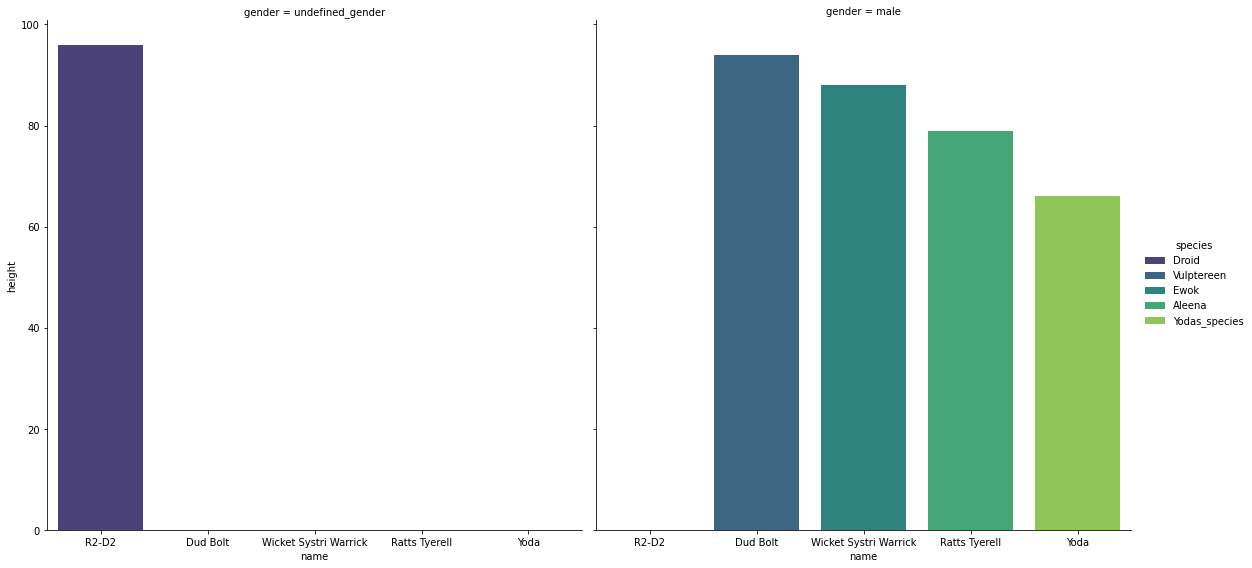

In [ ]:
sns.catplot(x="name", y="height",
                hue="species", col="gender",
                data=top5_smallest, kind="bar", palette="viridis", dodge=False,
                height=8, aspect=1);

> Top Five: Os 5 personagens mais pesados e os 5 mais leves de Starwars

In [ ]:
top5_heaviest = df_characters_raw.nlargest(5, 'mass').sort_values(by='mass', ascending=False)
top5_heaviest

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
76,Grievous,216.0,159.0,undefined_hair_color,brown_white,green_yellow,89,male,Kalee,Kaleesh
21,IG-88,200.0,140.0,undefined_hair_color,metal,red,15,undefined_gender,undefined_origin,Droid
3,Darth Vader,202.0,136.0,undefined_hair_color,white,yellow,41,male,Tatooine,Human
77,Tarfful,234.0,136.0,brown,brown,blue,200,male,Kashyyyk,Wookiee
5,Owen Lars,178.0,120.0,brown_grey,light,blue,52,male,Tatooine,Human


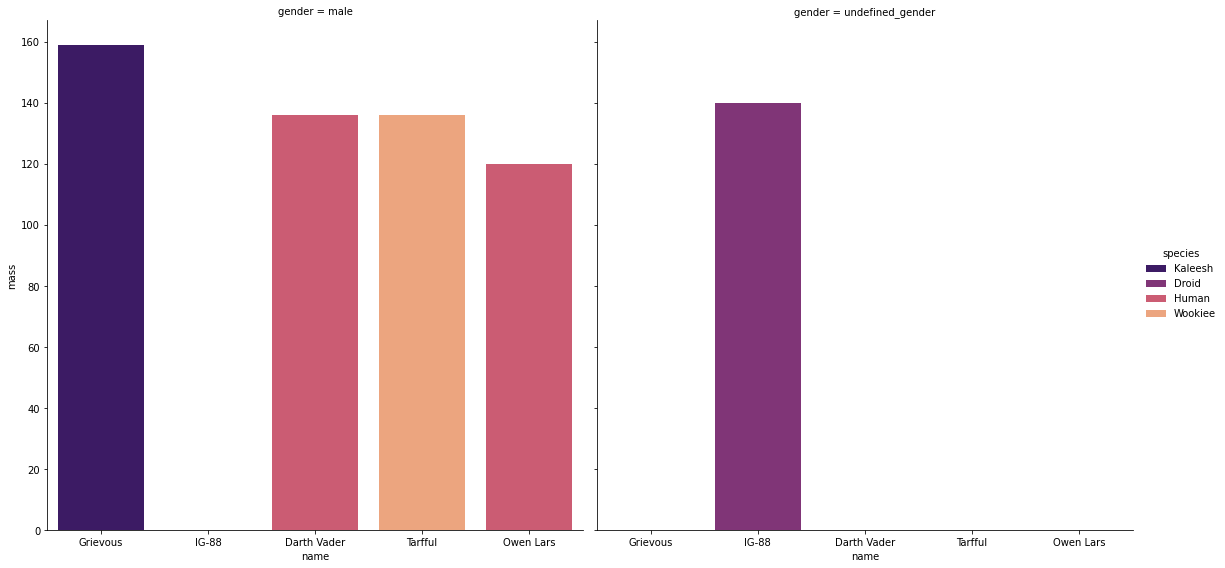

In [ ]:
sns.catplot(x="name", y="mass",
                hue="species", col="gender",
                data=top5_heaviest, kind="bar", palette="magma", dodge=False,
                height=8, aspect=1);

In [ ]:
top5_lightest = df_characters_raw.nsmallest(5, 'mass').sort_values(by='mass', ascending=False)
top5_lightest

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
2,R2-D2,96.0,32.000,undefined_hair_color,white_blue,red,33,undefined_gender,Naboo,Droid
28,Wicket Systri Warrick,88.0,20.000,brown,brown,brown,8,male,Endor,Ewok
18,Yoda,66.0,17.000,white,green,brown,896,male,undefined_origin,Yodas_species
71,Ratts Tyerell,79.0,15.000,undefined_hair_color,grey_blue,undefined_eye_color,89,male,Aleen Minor,Aleena
15,Jabba Desilijic Tiure,175.0,1.358,undefined_hair_color,green-tan_brown,orange,600,hermaphrodite,Nal Hutta,Hutt


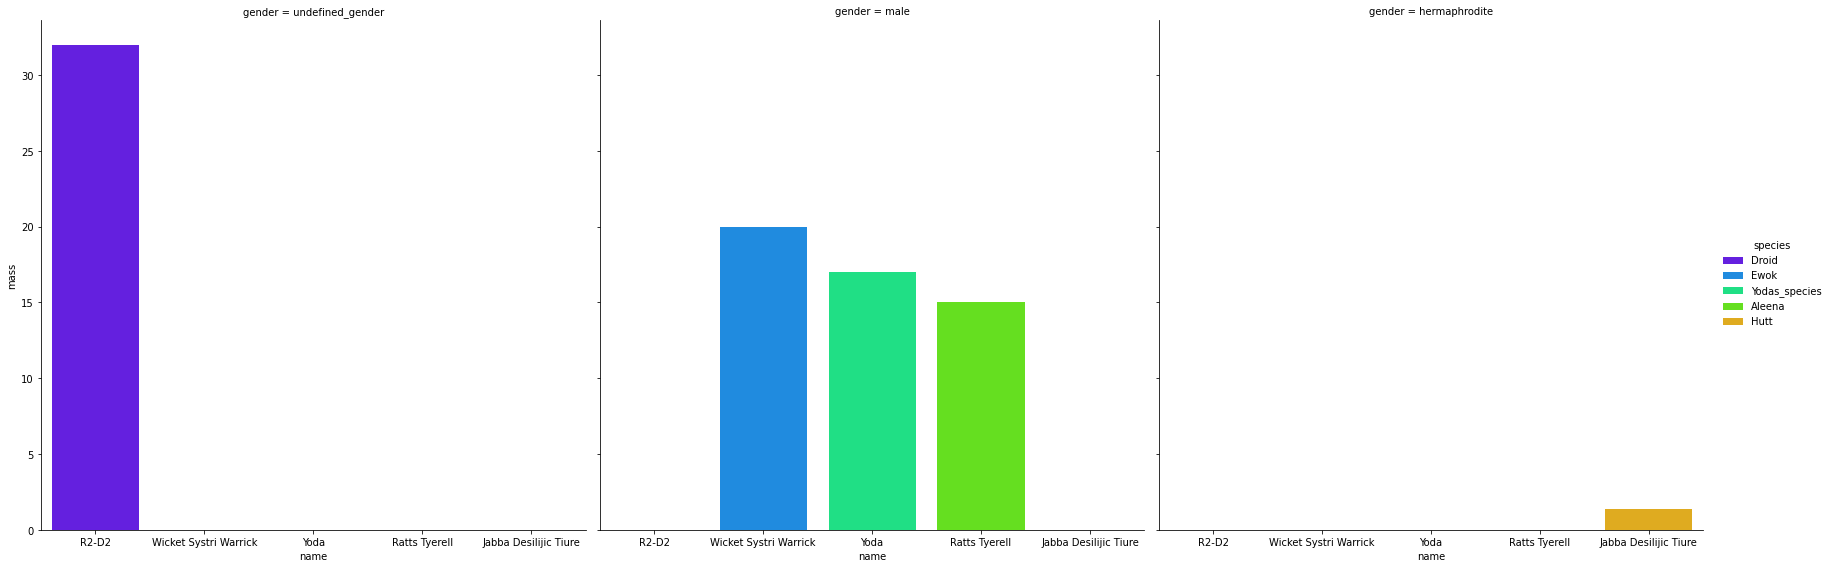

In [ ]:
sns.catplot(x="name", y="mass",
                hue="species", col="gender",
                data=top5_lightest, kind="bar", palette="gist_rainbow_r", dodge=False,
                height=8, aspect=1);

---
#### Data Distribution
---

In [ ]:
df_characters_raw.select_dtypes(include='number').describe(percentiles=[0.001,0.01,0.1,0.25,
                                                                        0.5,0.75,0.9,0.99,0.999])

,height,mass,birth_year
count,87.000000,87.000000,87.000000
mean,174.044360,74.912020,104.218391
std,33.742489,25.515812,129.237246
min,66.000000,1.358000,8.000000
0.1%,67.118000,2.531212,8.602000
1%,77.180000,13.090120,14.020000
10%,131.000000,46.800000,31.000000
25%,167.000000,68.483707,47.500000
50%,178.000000,79.000000,72.000000
75%,190.500000,82.781818,89.000000


> Distribuição da altura por espécie e por gênero

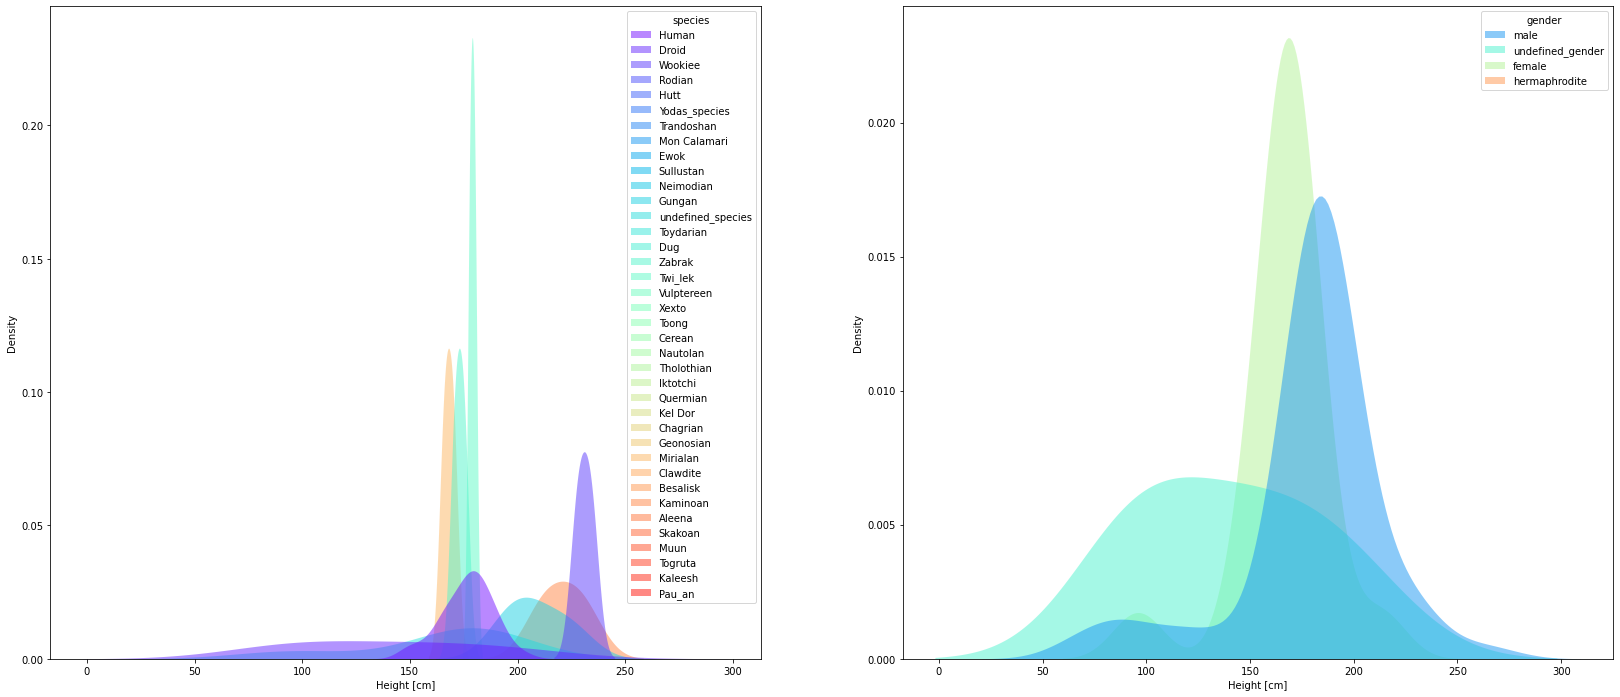

In [ ]:
fig = plt.figure(figsize = (28,12))
fig.add_subplot(1,2,1)
plt.xlabel('Height [cm]')
sns.kdeplot(
   data=df_characters_raw, x="height", hue="species",
   fill=True, common_norm=False, palette="rainbow",
   alpha=.5, linewidth=0, warn_singular=False
)

fig.add_subplot(1,2,2)
plt.xlabel('Height [cm]')
sns.kdeplot(
   data=df_characters_raw, x="height", hue="gender",
   fill=True, common_norm=False, palette="rainbow",
   alpha=.5, linewidth=0, warn_singular=False
)

> Distribuição da massa por espécie e por gênero

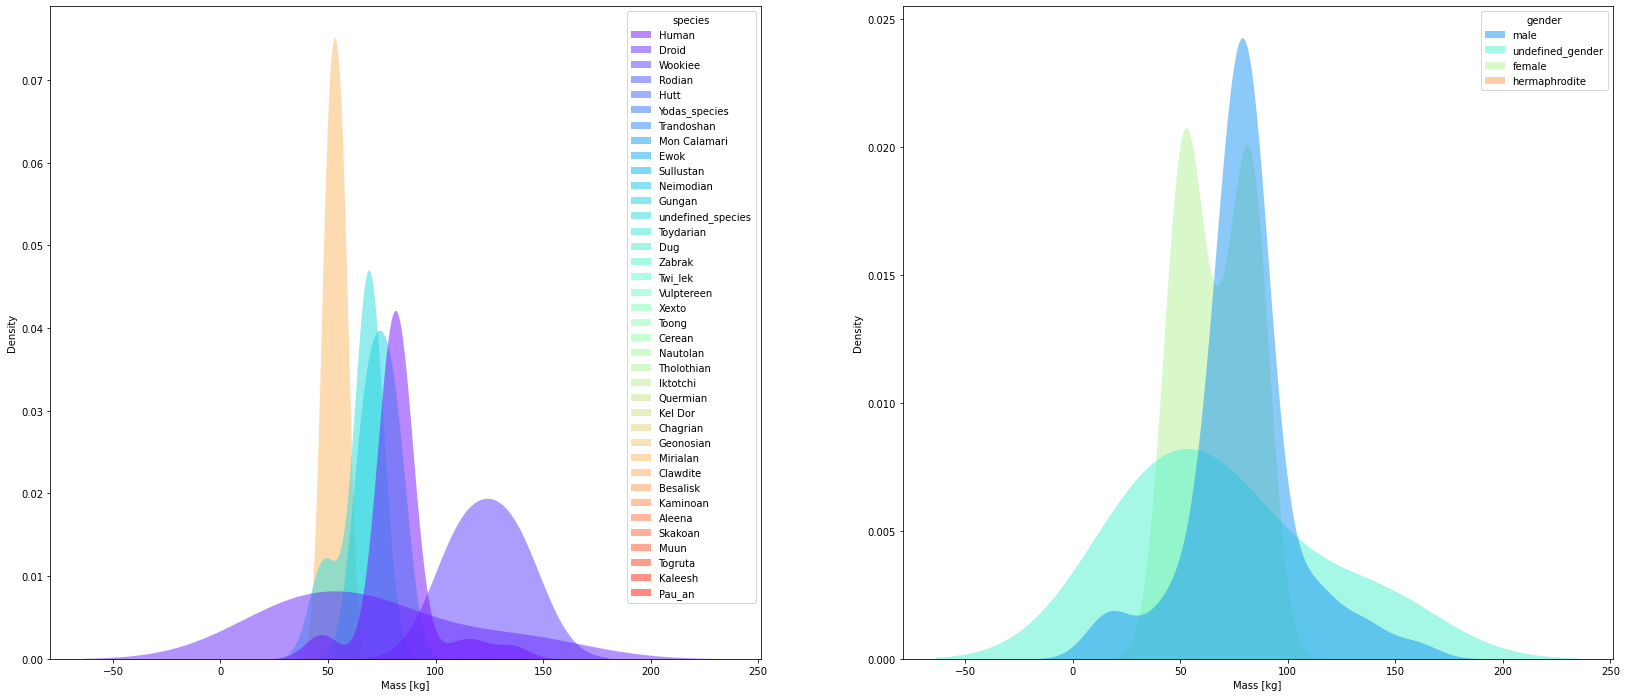

In [ ]:
fig = plt.figure(figsize = (28,12))
fig.add_subplot(1,2,1)
plt.xlabel('Mass [kg]')
sns.kdeplot(
   data=df_characters_raw, x="mass", hue="species",
   fill=True, common_norm=False, palette="rainbow",
   alpha=.5, linewidth=0, warn_singular=False
)

fig.add_subplot(1,2,2)
plt.xlabel('Mass [kg]')
sns.kdeplot(
   data=df_characters_raw, x="mass", hue="gender",
   fill=True, common_norm=False, palette="rainbow",
   alpha=.5, linewidth=0, warn_singular=False
)

> Relação Massa Vs. Peso matizados pelos valores da 'Probability Density Function'

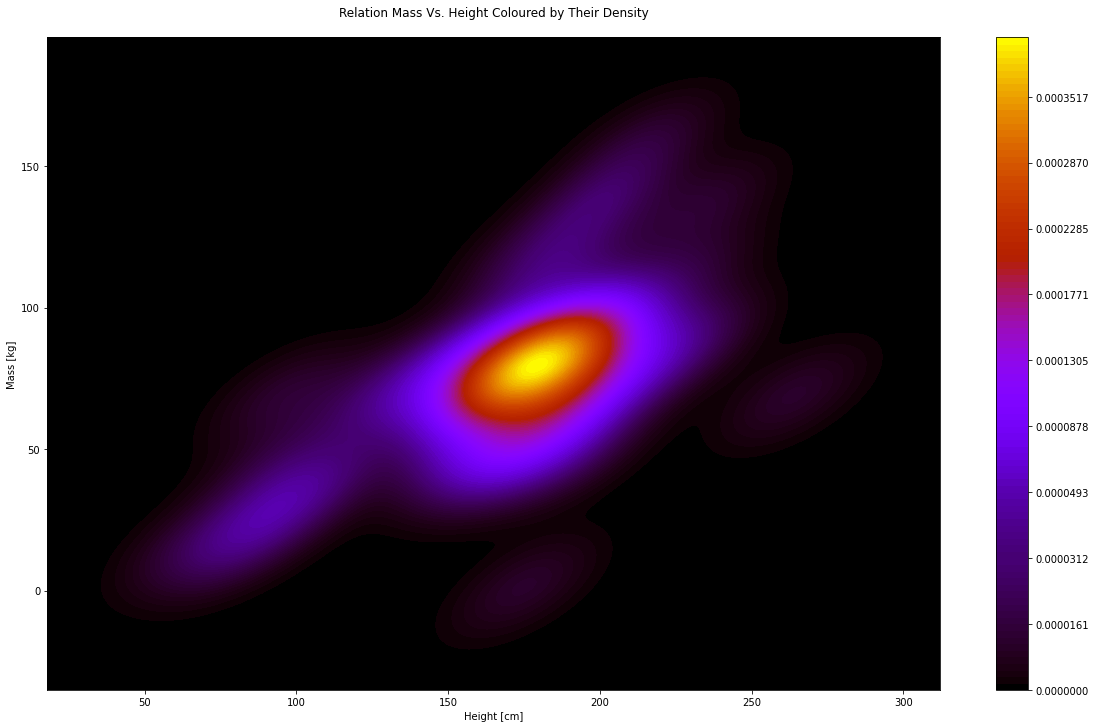

In [ ]:
fig, axs = plt.subplots(figsize=(20,12))
plt.title('Relation Mass Vs. Height Coloured by Their Density\n')
plt.xlabel('Height [cm]')
plt.ylabel('Mass [kg]')
sns.kdeplot(
    data=df_characters_raw, x="height", y="mass",
    fill=True, thresh=0, levels=100, cmap="gnuplot", cbar = True)

#https://seaborn.pydata.org/generated/seaborn.kdeplot.html

## b) Planets

### (i) Loading Dataset (raw)

In [ ]:
url_planets = 'https://raw.githubusercontent.com/JoaoCioffi/Kagglin/main/StarWars/planets.csv'
df_planets_raw = pd.read_csv(url_planets, sep=';')
df_planets_raw.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,grasslands_mountains,40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,temperate_tropical,1 standard,jungle_rainforests,8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,tundra_ice caves_mountain ranges,100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,swamp_jungles,8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,1 standard,gas_giant,0.0,6.000000e+06


In [ ]:
df_planets_raw.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 61
|   X
|  Columns: 9
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### (ii) Initial Analysis: Nulls, Dtypes, Data Distribution and Data Correlation

---
#### Metadata: Raw Data
---

In [ ]:
Metadata_planets_raw = pd.DataFrame({ 'Explicação':['Nome do planeta',
                                                    'Período de rotação [horas]',
                                                    'Período orbital [dias]',
                                                    'Diâmetro [km]',
                                                    'Clima',
                                                    'Gravidade [1 standard ~ 9.80665 m/s²] ',
                                                    'Tipo de terreno (inclui vegetação)',
                                                    'Percentual de água na superfície',
                                                    'População absoluta'],
                                      'Tipo da Variável' : list(df_planets_raw.dtypes.values),
                                      'Total de Registros Únicos': list(df_planets_raw.nunique()),
                                      'Total de Registros Nulos (NaN)' : list(df_planets_raw.isna().sum()),
                                      'Percentual de Registros Nulos (NaN)' : round(((df_planets_raw.isna().sum()/len(df_planets_raw)) * 100),4) })
Metadata_planets_raw

,Explicação,Tipo da Variável,Total de Registros Únicos,Total de Registros Nulos (NaN),Percentual de Registros Nulos (NaN)
name,Nome do planeta,object,60,1,1.6393
rotation_period,Período de rotação [horas],float64,19,13,21.3115
orbital_period,Período orbital [dias],float64,43,13,21.3115
diameter,Diâmetro [km],float64,39,17,27.8689
climate,Clima,object,20,13,21.3115
gravity,Gravidade [1 standard ~ 9.80665 m/s²],object,11,17,27.8689
terrain,Tipo de terreno (inclui vegetação),object,52,7,11.4754
surface_water,Percentual de água na superfície,float64,15,35,57.3770
population,População absoluta,float64,39,18,29.5082


---
#### Dtypes
---

Como podemos observar a partir do Metadata, algumas variáveis apresentam-se no formato de 'pandas object'. Devemos ter variáveis numéricas no formato 'int' ou 'float' e as categóricas como sendo do tipo 'string' ou 'category'

In [ ]:
df_planets_raw.pipe(change_type, ('name', 'climate', 'gravity', 'terrain'),
                                 ('string', 'string', 'string', 'string'))

df_characters_raw.dtypes # confirmando a alteração

name           string
height        float64
mass          float64
hair_color     string
skin_color     string
eye_color      string
birth_year      int64
gender         string
homeworld      string
species        string
dtype: object

---
#### Nulls
---

Aqui segue a mesma abordagem feita para o DF de personagens: como algumas Features apresentam muitos valores faltantes, não podemos simplesmente fazer um dropna() das linhas sem registro. Devemos analisar caso a caso para entender qual o melhor método de tratamento desses valores.


In [ ]:
df_planets_raw.pipe(nulls_qtd) # relembrando a qtd de nulos

name                1
rotation_period    13
orbital_period     13
diameter           17
climate            13
gravity            17
terrain             7
surface_water      35
population         18
dtype: int64



> Variáveis Numéricas:
>> Diferente do que ocorria com o DF de personagens, não temos neste caso essencialmente uma divisão categórica de cada planeta (até poderíamos agrupá-los por tipo de clima, mas sabemos que podemos ter planetas com características muito semelhantes em galáxias ou sistemas solares completamente diferentes, ou planetas completamente diferentes numa mesma galáxia ou sistema solar). Para evitar enviesar nossa análise faremos uma abordagem mais simples de calcular a média geral por Feature numérica


In [ ]:
df_planets_raw.select_dtypes(include='number').columns

Index(['rotation_period', 'orbital_period', 'diameter', 'surface_water',
       'population'],
      dtype='object')

In [ ]:
avg_rotation_period = df_planets_raw.rotation_period.mean()
print(f'Período de rotação médio ~ {round(avg_rotation_period, 4)} horas')
df_planets_raw.rotation_period = df_planets_raw.rotation_period.fillna(avg_rotation_period)


avg_orbital_period = df_planets_raw.orbital_period.mean()
print(f'Período orbital médio ~ {round(avg_orbital_period, 4)} dias')
df_planets_raw.orbital_period = df_planets_raw.orbital_period.fillna(avg_orbital_period)


avg_diameter = df_planets_raw.diameter.mean()
print(f'Diâmetro médio ~ {round(avg_diameter, 4)} km')
df_planets_raw.diameter = df_planets_raw.diameter.fillna(avg_diameter)


avg_surface_water = df_planets_raw.surface_water.mean()
print(f'Composição líquida média da superfície ~ {round(avg_surface_water, 4)} %')
df_planets_raw.surface_water = df_planets_raw.surface_water.fillna(avg_surface_water)

avg_population = df_planets_raw.population.mean()
print(f'População média ~ {int(avg_population)}')
df_planets_raw.population = df_planets_raw.population.fillna(avg_population)

print('-'*30)
print(df_planets_raw.pipe(nulls_qtd)) # confirmando as alterações

Período de rotação médio ~ 25.9583 horas
Período orbital médio ~ 577.625 dias
Diâmetro médio ~ 12388.3409 km
Composição líquida média da superfície ~ 36.7654 %
População média ~ 39800033313
------------------------------
name                1
rotation_period     0
orbital_period      0
diameter            0
climate            13
gravity            17
terrain             7
surface_water       0
population          0
dtype: int64
None


>>> |------ ***Variável 'gravity'*** ------|

>> Para *'gravity'* poderíamos aplicar a mesma abordagen. Entretanto antes devemos remover a unidade 'standard' (previamente definido como string) e então converter a coluna para o formato numérico. Após feito isso iremos pegar a gravidade média geral e atribuir aos nulos

In [ ]:
df_planets_raw.gravity # relembrando os valores contidos nessa Feature

0       1 standard
1       1 standard
2     1.1 standard
3             <NA>
4       1 standard
          ...     
56               1
57               1
58            <NA>
59      1 standard
60            <NA>
Name: gravity, Length: 61, dtype: string

In [ ]:
list_of_values_str = []
for x in df_planets_raw.gravity.values:
  list_of_values_str.append(str(x).split()[0])

print(list_of_values_str)



list_of_values_num = []
for s in list_of_values_str:
  if s != '<NA>':
    list_of_values_num.append(float(s))
  else:
    list_of_values_num.append(np.nan)

print(list_of_values_num)

['1', '1', '1.1', '<NA>', '1', '0.85', '1', '1', '1', '0.9', '1', '1', '1', '0.56', '1', '0.75', '1', '<NA>', '1', '1', '1', '1', '1', '1', '<NA>', '1', '<NA>', '0.62', '1', '1', '1', '1', '1', '1.56', '0.9', '1', '<NA>', '1', '<NA>', '<NA>', '0.98', '1', '1', '<NA>', '<NA>', '1', '<NA>', '1', '1', '<NA>', '<NA>', '<NA>', '<NA>', '<NA>', '1', '1', '1', '1', '<NA>', '1', '<NA>']
[1.0, 1.0, 1.1, nan, 1.0, 0.85, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.56, 1.0, 0.75, 1.0, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, nan, 1.0, nan, 0.62, 1.0, 1.0, 1.0, 1.0, 1.0, 1.56, 0.9, 1.0, nan, 1.0, nan, nan, 0.98, 1.0, 1.0, nan, nan, 1.0, nan, 1.0, 1.0, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, nan, 1.0, nan]


In [ ]:
df_planets_raw.gravity = list_of_values_num # Atribuindo inicialmente a lista com os valores iterados acima
avg_gravity = df_planets_raw.gravity.mean() # retorna a gravidade média
print('Total de nulos: ', df_planets_raw.gravity.isna().sum())
print(f'Gravidade média ~ {round(avg_gravity, 4)} standard')


# Ainda temos valores nulos, então aplicando um fillna() e passando o valor médio como argumento teremos:
df_planets_raw.gravity = df_planets_raw.gravity.fillna(avg_gravity)
print('Total de nulos: ', df_planets_raw.gravity.isna().sum()) # confirmando a alteração

Total de nulos:  17
Gravidade média ~ 0.9823 standard
Total de nulos:  0


Feito os preenchimentos numéricos de nulos nos campos numéricos, agora devemos passar para as variáveis categóricas

> Variáveis Categóricas:
>> Poderíamos aplicar as mesmas duas abordagens citadas para o DF characters: (1) preencher os nulos com a moda de cada categoria, ou (2) criar uma nova variação destas categorias como sendo 'indefinido', 'não-listado', ou algo do tipo. O grande problema de substituir pela moda é que poderíamos estar enviesando a categoria (isto é, estaríamos aumentando ainda mais a frequência do valor tido como moda).
Portanto iremos apenas criar uma nova categoria para cada uma delas. Não é necessario o tratamento por agrupamento, podemos fazer diretamente pelo fillna()

In [ ]:
df_planets_raw.columns

Index(['name', 'rotation_period', 'orbital_period', 'diameter', 'climate',
       'gravity', 'terrain', 'surface_water', 'population'],
      dtype='object')

>>> |------ ***Variável 'name'*** ------|

In [ ]:
# Relembrando dos valores nulos:
print('Total de nulos: ', df_planets_raw.name.isna().sum())
df_planets_raw.name = df_planets_raw.name.fillna('Unnamed Planet')
print('Total de nulos: ', df_planets_raw.name.isna().sum()) # confirmando a alteração

Total de nulos:  1
Total de nulos:  0


>>> |------ ***Variável 'climate'*** ------|

In [ ]:
print('Total de nulos: ', df_planets_raw.climate.isna().sum())
df_planets_raw.climate = df_planets_raw.climate.fillna('undefined_climate')
print('Total de nulos: ', df_planets_raw.climate.isna().sum()) # confirmando a alteração

Total de nulos:  13
Total de nulos:  0


>>> |------ ***Variável 'terrain'*** ------|

In [ ]:
print('Total de nulos: ', df_planets_raw.terrain.isna().sum())
df_planets_raw.terrain = df_planets_raw.terrain.fillna('undefined_terrain')
print('Total de nulos: ', df_planets_raw.terrain.isna().sum()) # confirmando a alteração

Total de nulos:  7
Total de nulos:  0


Agora devemos confirmar se todos os preenchimentos foram efetuados

In [ ]:
df_planets_raw.isna().sum()

name               0
rotation_period    0
orbital_period     0
diameter           0
climate            0
gravity            0
terrain            0
surface_water      0
population         0
dtype: int64

---
#### Data Distribution
---

In [ ]:
df_planets_raw.dtypes

name                string
rotation_period    float64
orbital_period     float64
diameter           float64
climate             string
gravity            float64
terrain             string
surface_water      float64
population         float64
dtype: object

In [ ]:
df_planets_raw.select_dtypes(include='number').describe(percentiles=[0.001,0.01,0.1,0.25,
                                                                     0.5,0.75,0.9,0.99,0.999])

,rotation_period,orbital_period,diameter,gravity,surface_water,population
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,25.958333,577.625000,12388.340909,0.982273,36.765385,3.980003e+10
std,9.899425,843.733185,14430.446871,0.112040,25.065840,1.410441e+11
min,0.000000,0.000000,0.000000,0.560000,0.000000,0.000000e+00
0.1%,0.720000,10.020000,0.000000,0.563600,0.000000,6.000000e+01
1%,7.200000,100.200000,0.000000,0.596000,0.000000,6.000000e+02
10%,20.000000,256.000000,4200.000000,0.980000,5.000000,7.053000e+05
25%,23.000000,329.000000,10088.000000,0.982273,36.765385,4.500000e+07
50%,25.958333,391.000000,12388.340909,1.000000,36.765385,3.000000e+09
75%,26.000000,577.625000,12500.000000,1.000000,36.765385,3.980003e+10


> Hist-plot das variáveis numéricas

In [ ]:
contColNames = list(df_planets_raw.select_dtypes(include='number').columns) #-> seleciona apenas colunas numéricas
ncols = 3 #-> número de colunas que armazenarão os plots na figure 
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #-> número de linhas que armazenarão os plots na figure 

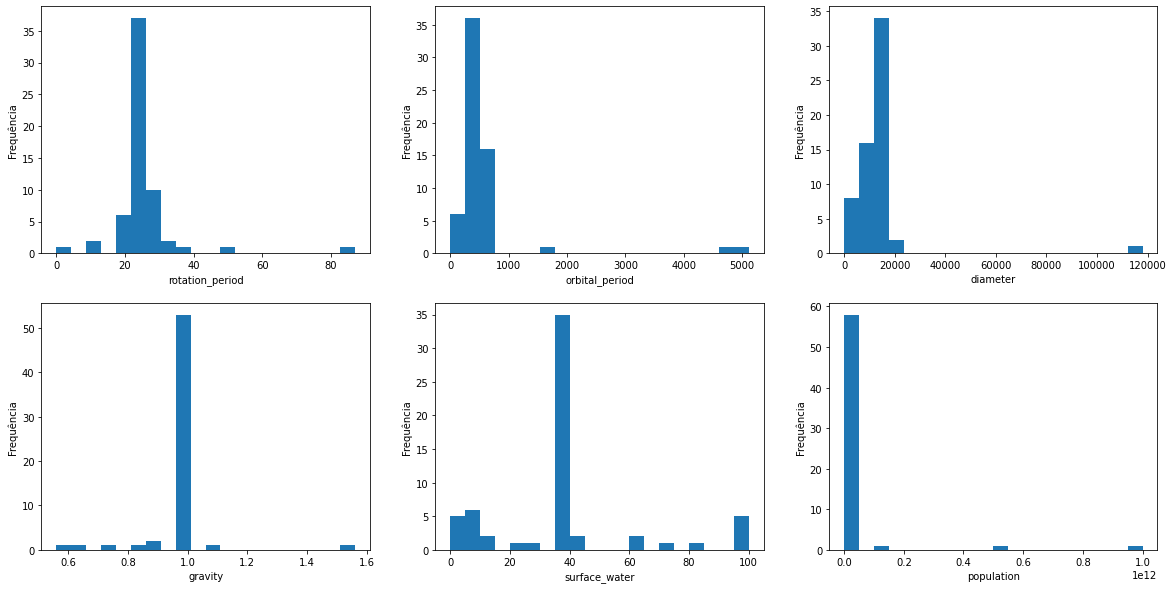

In [ ]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df_planets_raw.select_dtypes(include='number')[contColNames[counter]], bins=20)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

Algumas observações interessantes:
- rotation_period, orbital_period, diameter e surface_water: curiosamente apresentam valores mínimos iguais a zero. Isso é inconsistente para o problema (fisicamente), então podemos aplicar correções como: atribuir a eles os valores dos percentis mais próximos que estejam acima de 0, substituir pela média ou mediana, dentre outros;
- population: existe uma grande concentração de planetas inabitados, enquanto poucos seriam outliers nessa distribuição (observe o gap entre os bins, inclusive existe um salto de absolutamente zero para algo na escala de 1e+12). Isso fisicamente seria bastante consistente - compare Terra à Marte, por exemplo -, entretanto é necessário estudar para confirmar se na história de StarWars realmente existe essa quantidade de planetas sem população.
- Estas são análises inicias e não devem ser interpretadas como resposta final de uma EDA. Além disso, para construir um modelo de ML seria necessário tratar os intervalos e aplicar testes de normalidade na variável target


---
#### Data Correlation
---

In [ ]:
df_planets_raw.corr()

,rotation_period,orbital_period,diameter,gravity,surface_water,population
rotation_period,1.000000,-0.062825,-0.118284,0.000210,0.028889,-0.028126
orbital_period,-0.062825,1.000000,0.670216,0.002593,-0.202392,-0.058029
diameter,-0.118284,0.670216,1.000000,0.163953,-0.138186,-0.012441
gravity,0.000210,0.002593,0.163953,1.000000,0.167921,0.030489
surface_water,0.028889,-0.202392,-0.138186,0.167921,1.000000,-0.003585
population,-0.028126,-0.058029,-0.012441,0.030489,-0.003585,1.000000


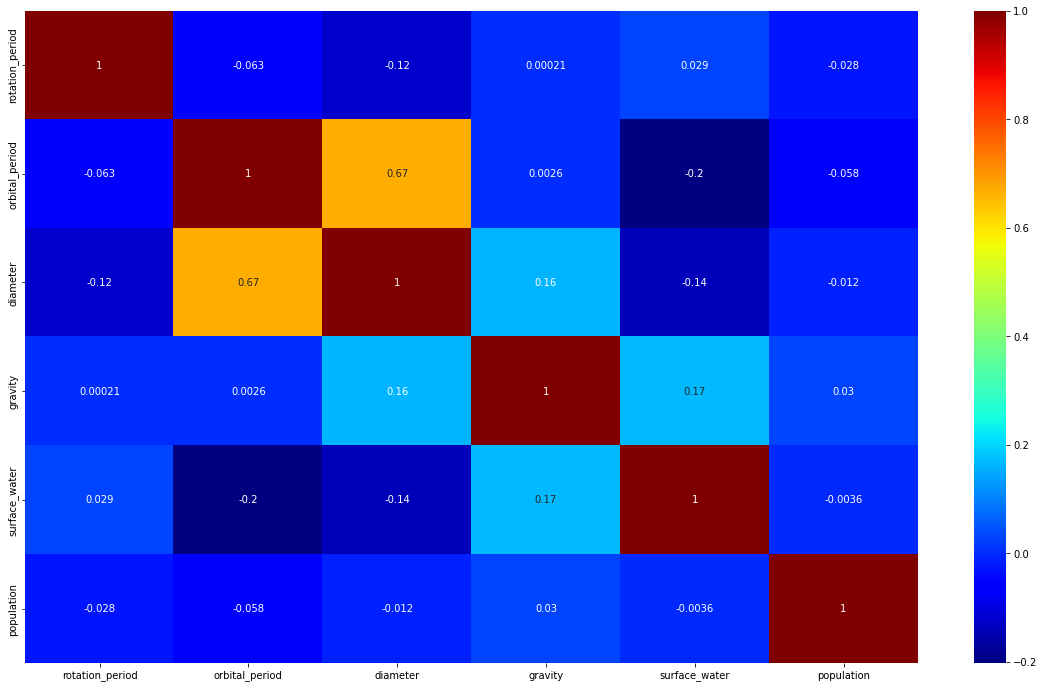

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_planets_raw.corr(), annot=True, cmap='jet')

Podemos observar que as varáveis, no geral, apresentam baixa correlação. Isso pode ser uma vantagem para um modelo preditivo, pois os regressores não apresentariam inflação ou problemas de multicolinearidade. 

A unica correlação mais evidente é a de `orbital_period X diameter`, mas isso talvez seja bem factível, já que as Leis de Keppler introduzem o Raio na equação do período orbital (http://tornado.sfsu.edu/geosciences/classes/m415_715/monteverdi/labs/InclassLab2/u6l4c.html)

## c) Species

### (i) Loading Dataset (raw)

In [ ]:
url_species = 'https://raw.githubusercontent.com/JoaoCioffi/Kagglin/main/StarWars/species.csv'
df_species_raw = pd.read_csv(url_species, sep=';')
df_species_raw.head()

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,language,homeworld
0,Hutt,gastropod,sentient,300.0,green_brown_tan,NaN,yellow_red,1000.0,Huttese,Nal Hutta
1,Yodas_species,mammal,sentient,66.0,green_yellow,brown_white,brown_green_yellow,900.0,Galactic basic,NaN
2,Trandoshan,reptile,sentient,200.0,brown_green,NaN,yellow_orange,NaN,Dosh,Trandosha
3,Mon Calamari,amphibian,sentient,160.0,red_blue_brown_magenta,NaN,yellow,NaN,Mon Calamarian,Mon Cala
4,Ewok,mammal,sentient,100.0,brown,white_brown_black,orange_brown,NaN,Ewokese,Endor


In [ ]:
df_species_raw.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 37
|   X
|  Columns: 10
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


## d) Starships

### (i) Loading Dataset (raw)

In [ ]:
url_starships = 'https://raw.githubusercontent.com/JoaoCioffi/Kagglin/main/StarWars/starships.csv'
df_starships_raw = pd.read_csv(url_starships, sep=';')
df_starships_raw.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,Kuat Drive Yards,1.143350e+09,19000.00,NaN,279144.0,38000.0,2.500000e+08,6 years,2.0,40.0,Star_Dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,Sienar Fleet Systems,2.400000e+05,38.00,1000.0,5.0,75.0,1.800000e+05,1 month,1.0,70.0,Landing_Craft
2,Death Star,DS-1 Orbital Battle Station,Sienar Fleet Systems,1.000000e+12,120000.00,NaN,342953.0,843342.0,1.000000e+12,3 years,4.0,10.0,Deep_Space_Mobile_Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,1.000000e+05,34.37,1050.0,4.0,6.0,1.000000e+05,2 months,0.5,75.0,Light_Freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,1.349990e+05,14.00,1000.0,2.0,0.0,1.100000e+02,1 week,1.0,80.0,Assault_Starfighter


In [ ]:
df_starships_raw.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 37
|   X
|  Columns: 13
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### (ii) Initial Analysis: Nulls, Dtypes and Data Distribution

In [ ]:
df_starships_raw.columns

Index(['name', 'model', 'manufacturer', 'cost_in_credits', 'length',
       'max_atmosphering_speed', 'crew', 'passengers', 'cargo_capacity',
       'consumables', 'hyperdrive_rating', 'MGLT', 'starship_class'],
      dtype='object')


---
#### Metadata: Raw Data
---

In [ ]:
Metadata_starships_raw = pd.DataFrame({ 'Explicação':['Nome da espaçonave',
                                                      'Modelo',
                                                      'Fabricante',
                                                      'Custo (créditos)',
                                                      'Comprimento [m]',
                                                      'Velocidade máxima atmosférica [km/h]',
                                                      'Tripulação',
                                                      'Passageiros',
                                                      'Capacidade de carga [kg]',
                                                      'Consumível (tempo)',
                                                      'Taxa de hipercondução na escala de velocidade superluminal',
                                                      'A unidade padrão de distância no espaço é megalight ou MGLT. No caso estamos caracterizando a velocidade em MGLT/hora',
                                                      'Classe da espaçonave'],
                                         'Tipo da Variável' : list(df_starships_raw.dtypes.values),
                                         'Total de Registros Únicos': list(df_starships_raw.nunique()),
                                         'Total de Registros Nulos (NaN)' : list(df_starships_raw.isna().sum()),
                                         'Percentual de Registros Nulos (NaN)' : round(((df_starships_raw.isna().sum()/len(df_starships_raw)) * 100),4) })
Metadata_starships_raw

,Explicação,Tipo da Variável,Total de Registros Únicos,Total de Registros Nulos (NaN),Percentual de Registros Nulos (NaN)
name,Nome da espaçonave,object,37,0,0.0000
model,Modelo,object,37,0,0.0000
manufacturer,Fabricante,object,17,0,0.0000
cost_in_credits,Custo (créditos),float64,25,11,29.7297
length,Comprimento [m],float64,36,1,2.7027
max_atmosphering_speed,Velocidade máxima atmosférica [km/h],float64,18,8,21.6216
crew,Tripulação,float64,19,1,2.7027
passengers,Passageiros,float64,19,0,0.0000
cargo_capacity,Capacidade de carga [kg],float64,25,8,21.6216
consumables,Consumível (tempo),object,16,6,16.2162


Obs: 

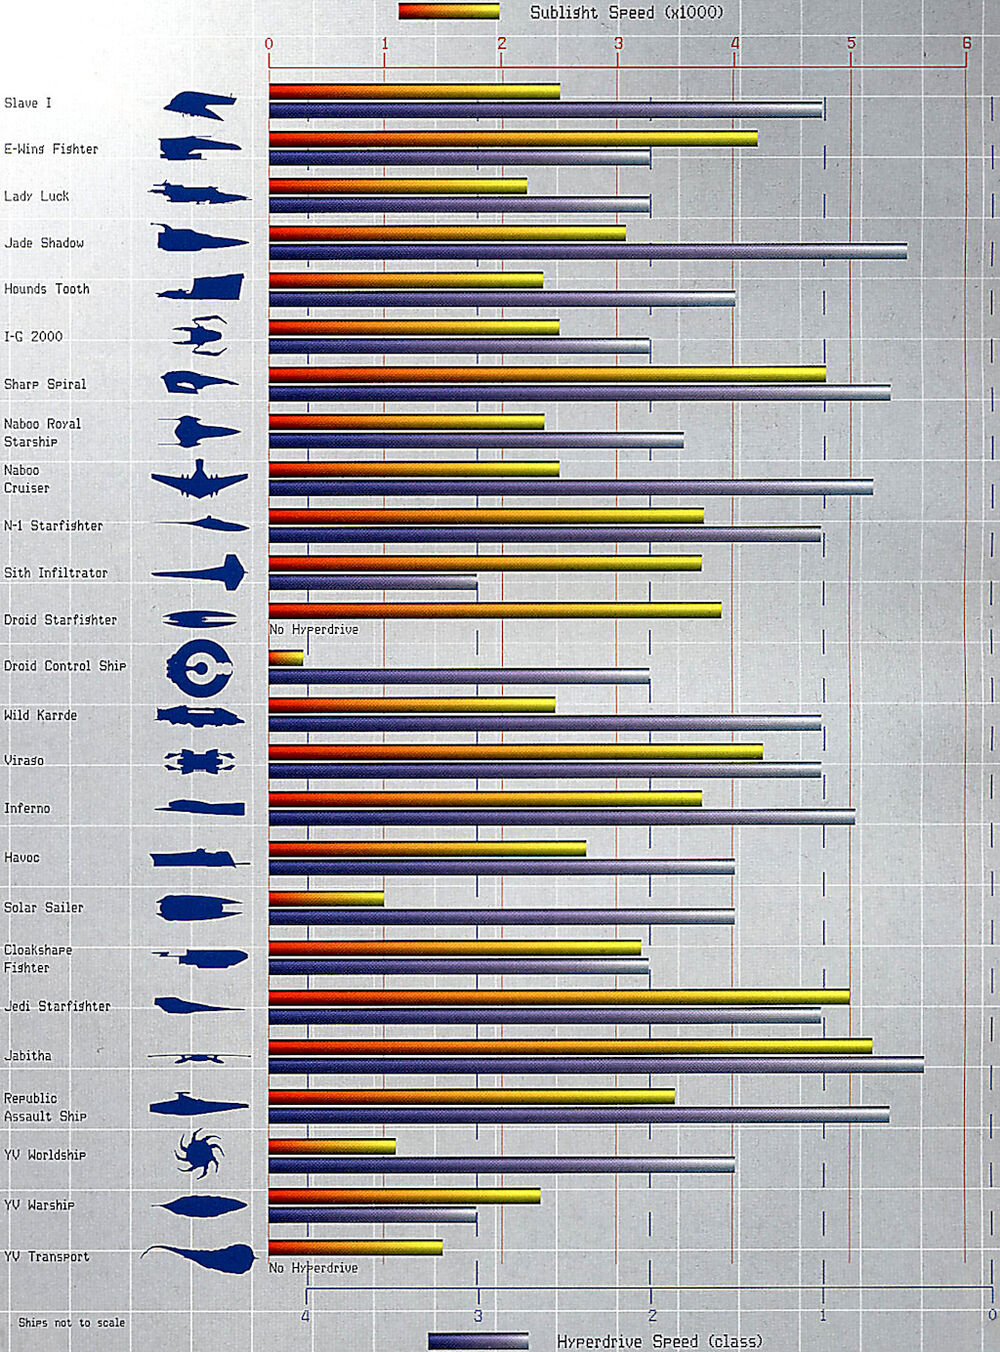

- hyperdrive_rating: The superluminal speed of a hyperdrive was rated on an inverse scale: the faster the hyperdrive, the lower the rating. These ratings, generally called "Classes," provided a quick, although often inconsistent or inaccurate, idea of a ship's hyperdrive speed. The hyperdrive class acted as a multiplier for a given base travel time. Thus, a Class 2 hyperdrive took twice the base time to travel a given route, while the Millennium Falcon's Class 0.5 took only half the base time. (https://starwars.fandom.com/wiki/Hyperdrive/Legends)

---
#### Dtypes
---

Como podemos observar a partir do Metadata, algumas variáveis apresentam-se no formato de 'pandas object'. Devemos ter variáveis numéricas no formato 'int' ou 'float' e as categóricas como sendo do tipo 'string' ou 'category'


In [ ]:
df_starships_raw.pipe(change_type, ('name','model','manufacturer','consumables','starship_class'),
                                   ('string','string','string','string','string') )

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,Kuat Drive Yards,1.143350e+09,19000.00,NaN,279144.0,38000.0,2.500000e+08,6 years,2.0,40.0,Star_Dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,Sienar Fleet Systems,2.400000e+05,38.00,1000.0,5.0,75.0,1.800000e+05,1 month,1.0,70.0,Landing_Craft
2,Death Star,DS-1 Orbital Battle Station,Sienar Fleet Systems,1.000000e+12,120000.00,NaN,342953.0,843342.0,1.000000e+12,3 years,4.0,10.0,Deep_Space_Mobile_Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,1.000000e+05,34.37,1050.0,4.0,6.0,1.000000e+05,2 months,0.5,75.0,Light_Freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,1.349990e+05,14.00,1000.0,2.0,0.0,1.100000e+02,1 week,1.0,80.0,Assault_Starfighter
5,X-wing,T-65 X-wing,Incom Corporation,1.499990e+05,12.50,1050.0,1.0,0.0,1.100000e+02,1 week,1.0,100.0,Star_Fighter
6,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,NaN,9.20,1200.0,1.0,0.0,1.500000e+02,5 days,1.0,105.0,Star_Fighter
7,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,NaN,21.50,1000.0,1.0,6.0,7.000000e+04,1 month,3.0,70.0,Patrol_Craft
8,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,2.400000e+05,20.00,850.0,6.0,20.0,8.000000e+04,2 months,1.0,50.0,Armed_Government_Transport
9,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8.500000e+06,300.00,800.0,854.0,75.0,6.000000e+06,2 years,2.0,40.0,Escort_Ship


---
#### Nulls
---

Aqui seguem as mesmas abordagens feitas anteriormente: como algumas Features apresentam muitos valores faltantes, não podemos simplesmente fazer um dropna() das linhas sem registro. Devemos analisar caso a caso para entender qual o melhor método de tratamento desses valores.

In [ ]:
df_starships_raw.pipe(nulls_qtd) # relembrando a qtd de nulos

name                       0
model                      0
manufacturer               0
cost_in_credits           11
length                     1
max_atmosphering_speed     8
crew                       1
passengers                 0
cargo_capacity             8
consumables                6
hyperdrive_rating          2
MGLT                      20
starship_class             0
dtype: int64


> Variáveis Numéricas:
>> Nesta etapa iremos tratar algumas variáveis numéricas com uma abordagem semelhante ao que fizemos para o DF characters: agrupando cada espaçonave pela categoria 'starship_class', teremos valores médios e poderemos substituir os nulos por isso

In [ ]:
df_starships_grouped_class = df_starships_raw.groupby(by = 'starship_class').agg({'cost_in_credits':'mean',
                                                                                  'length':'mean',
                                                                                  'max_atmosphering_speed':'mean',
                                                                                  'crew':'mean',
                                                                                  'cargo_capacity':'mean',
                                                                                  'hyperdrive_rating':'mean',
                                                                                  'MGLT':'mean'})
df_starships_grouped_class.head()

,cost_in_credits,length,max_atmosphering_speed,crew,cargo_capacity,hyperdrive_rating,MGLT
starship_class,,,,,,,
Armed_Government_Transport,240000.0,20.00,850.0,6.0,80000.0,1.0,50.0
Assault_Ship,NaN,752.00,NaN,700.0,11250000.0,0.6,NaN
Assault_Starfighter,177499.5,15.45,975.0,1.5,77.5,1.5,85.5
Capital_Ship,125000000.0,1088.00,1050.0,600.0,50000000.0,1.5,NaN
Corvette,3500000.0,150.00,950.0,165.0,3000000.0,2.0,60.0


In [ ]:
df_starships_grouped_class.isna().sum()

cost_in_credits            7
length                     1
max_atmosphering_speed     8
crew                       1
cargo_capacity             5
hyperdrive_rating          2
MGLT                      12
dtype: int64


>> Agora temos para cada starship_class os valores médios das demais variáveis. Entretanto podemos perceber que ainda existem campos nulos. Como não temos informações para este tipo, iremos então atribuir a média geral para cada campo


In [ ]:
df_starships_grouped_class.columns

Index(['cost_in_credits', 'length', 'max_atmosphering_speed', 'crew',
       'cargo_capacity', 'hyperdrive_rating', 'MGLT'],
      dtype='object')

In [ ]:
avg_cost = np.mean(df_starships_grouped_class.cost_in_credits)
print(f'Custo médio agrupado ~ {round(avg_cost, 4)} credits')
df_starships_grouped_class.cost_in_credits = df_starships_grouped_class.cost_in_credits.fillna(avg_cost)

avg_length = np.mean(df_starships_grouped_class.length)
print(f'Comprimento médio agrupado ~ {round(avg_length, 4)} [m]')
df_starships_grouped_class.length = df_starships_grouped_class.length.fillna(avg_length)

avg_max_atmspeed = np.mean(df_starships_grouped_class.max_atmosphering_speed)
print(f'Velocidade atmosférica média agrupada ~ {round(avg_max_atmspeed, 4)} [km/h]')
df_starships_grouped_class.max_atmosphering_speed = df_starships_grouped_class.max_atmosphering_speed.fillna(avg_max_atmspeed)

avg_crew = np.mean(df_starships_grouped_class.crew)
print(f'Média agrupada da tripulação ~ {int(avg_crew)}')
df_starships_grouped_class.crew = df_starships_grouped_class.crew.fillna(avg_crew)

avg_cargo_cap = np.mean(df_starships_grouped_class.cargo_capacity)
print(f'Capacidade de carga média agrupada ~ {round(avg_cargo_cap, 4)} [kg]]')
df_starships_grouped_class.cargo_capacity = df_starships_grouped_class.cargo_capacity.fillna(avg_cargo_cap)

avg_hyperdrive = np.mean(df_starships_grouped_class.hyperdrive_rating)
print(f'Taxa média agrupada do hyperdrive ~ {round(avg_hyperdrive, 4)}')
df_starships_grouped_class.hyperdrive_rating = df_starships_grouped_class.hyperdrive_rating.fillna(avg_hyperdrive)

avg_MGLT = np.mean(df_starships_grouped_class.MGLT)
print(f'Velocidade MGLT média agrupado ~ {round(avg_MGLT, 4)} [MGLT/h]')
df_starships_grouped_class.MGLT = df_starships_grouped_class.MGLT.fillna(avg_MGLT)

print('-'*30)
print(df_starships_grouped_class.isna().sum()) # confirmando a alteração

Custo médio agrupado ~ 55644722483.2976 credits
Comprimento médio agrupado ~ 6196.7294 [m]
Velocidade atmosférica média agrupada ~ 1210.8824 [km/h]
Média agrupada da tripulação ~ 27394
Capacidade de carga média agrupada ~ 50220511523.4688 [kg]]
Taxa média agrupada do hyperdrive ~ 1.6348
Velocidade MGLT média agrupado ~ 57.4423 [MGLT/h]
------------------------------
cost_in_credits           0
length                    0
max_atmosphering_speed    0
crew                      0
cargo_capacity            0
hyperdrive_rating         0
MGLT                      0
dtype: int64


>> Agora podemos com uma única linha agregar as transformações por média e em seguida aplicar o fillna() do Pandas:
>>> |------ ***Variável 'cost_in_credits'*** ------|

In [ ]:
df_starships_raw.cost_in_credits.fillna(df_starships_raw.groupby(by = 'starship_class')['cost_in_credits'].transform('mean'))

0     1.143350e+09
1     2.400000e+05
2     1.000000e+12
3     1.000000e+05
4     1.349990e+05
5     1.499990e+05
6     1.814999e+05
7              NaN
8     2.400000e+05
9     8.500000e+06
10    1.040000e+08
11    1.750000e+05
12    2.200000e+05
13             NaN
14    2.000000e+05
15    3.570000e+04
16    5.500000e+07
17    2.000000e+06
18             NaN
19    1.800000e+05
20    3.570000e+04
21    1.500000e+08
22    1.250000e+08
23    1.000000e+06
24             NaN
25             NaN
26             NaN
27             NaN
28    3.570000e+04
29    5.900000e+07
30    3.570000e+04
31    3.200000e+05
32    1.550000e+05
33    1.680000e+05
34    1.025000e+05
35    3.500000e+06
36    5.700000e+07
Name: cost_in_credits, dtype: float64

In [ ]:
df_starships_raw.cost_in_credits = df_starships_raw.cost_in_credits.fillna(df_starships_raw.groupby(by = 'starship_class')['cost_in_credits'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.cost_in_credits = df_starships_raw.cost_in_credits.fillna(avg_cost) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.cost_in_credits.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'length'*** ------|

In [ ]:
df_starships_raw.length = df_starships_raw.length.fillna(df_starships_raw.groupby(by = 'starship_class')['length'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.length = df_starships_raw.length.fillna(avg_length) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.length.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'max_atmosphering_speed'*** ------|

In [ ]:
df_starships_raw.max_atmosphering_speed = df_starships_raw.max_atmosphering_speed.fillna(df_starships_raw.groupby(by = 'starship_class')['max_atmosphering_speed'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.max_atmosphering_speed = df_starships_raw.max_atmosphering_speed.fillna(avg_max_atmspeed) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.max_atmosphering_speed.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'crew'*** ------|

In [ ]:
df_starships_raw.crew = df_starships_raw.crew.fillna(df_starships_raw.groupby(by = 'starship_class')['crew'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.crew = df_starships_raw.crew.fillna(int(avg_crew)) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.crew.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'cargo_capacity'*** ------|

In [ ]:
df_starships_raw.cargo_capacity = df_starships_raw.cargo_capacity.fillna(df_starships_raw.groupby(by = 'starship_class')['cargo_capacity'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.cargo_capacity = df_starships_raw.cargo_capacity.fillna(avg_cargo_cap) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.cargo_capacity.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'hyperdrive_rating'*** ------|

In [ ]:
df_starships_raw.hyperdrive_rating = df_starships_raw.hyperdrive_rating.fillna(df_starships_raw.groupby(by = 'starship_class')['hyperdrive_rating'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.hyperdrive_rating = df_starships_raw.hyperdrive_rating.fillna(avg_hyperdrive) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.hyperdrive_rating.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'MGLT'*** ------|

In [ ]:
df_starships_raw.MGLT = df_starships_raw.MGLT.fillna(df_starships_raw.groupby(by = 'starship_class')['MGLT'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.MGLT = df_starships_raw.MGLT.fillna(avg_MGLT) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.MGLT.isna().sum() # confirma os resíduos de nulos

0

>>> |------ ***Variável 'consumables'*** ------|

Por padrão temos os consumíveis dados em tempo que pode variar de uma espaçonave para outras (alguns possuem a duração em horas enquanto outros podem apresentar uma capacidade de anos de duração). Para padronizar iremos transformar todos os valores na unidade de hora

In [ ]:
df_starships_raw.consumables.values

<StringArray>
[ '6 years',  '1 month',  '3 years', '2 months',   '1 week',   '1 week',
   '5 days',  '1 month', '2 months',  '2 years',  '2 years',   '1 week',
   '1 week',       <NA>,   '7 days',       <NA>,  '30 days',   '1 year',
       <NA>,   '7 days',       <NA>,  '2 years',  '4 years',  '56 days',
       <NA>, '6 months', '500 days',  '2 years',   '7 days',  '2 years',
       <NA>,   '2 days',   '5 days',   '7 days', '15 hours',   '1 year',
  '2 years']
Length: 37, dtype: string

In [ ]:
consumables_list_raw = list(df_starships_raw.consumables.values)
consumables_list_new = []

for c in consumables_list_raw:
  c = str(c)
  if c != '<NA>':
    if c.split()[1] == 'hour' or c.split()[1] == 'hours':
      consumables_list_new.append(float(c.split()[0]))

    elif c.split()[1] == 'day' or c.split()[1] == 'days': #considerando 24h diárias (padrão da Terra)
      consumables_list_new.append(24*float(c.split()[0]))  

    elif c.split()[1] == 'week' or c.split()[1] == 'weeks': #considerando 7 dias por semana
      consumables_list_new.append(24*7*float(c.split()[0]))

    elif c.split()[1] == 'month' or c.split()[1] == 'months': #considerando 30 dias no mês
      consumables_list_new.append(24*30*float(c.split()[0]))

    else: #considerando 365 dias no ano
      consumables_list_new.append(24*365*float(c.split()[0]))
    
  else:
    consumables_list_new.append(np.nan)

print(consumables_list_new)

[52560.0, 720.0, 26280.0, 1440.0, 168.0, 168.0, 120.0, 720.0, 1440.0, 17520.0, 17520.0, 168.0, 168.0, nan, 168.0, nan, 720.0, 8760.0, nan, 168.0, nan, 17520.0, 35040.0, 1344.0, nan, 4320.0, 12000.0, 17520.0, 168.0, 17520.0, nan, 48.0, 120.0, 168.0, 15.0, 8760.0, 17520.0]


In [ ]:
df_starships_raw.consumables = consumables_list_new
df_starships_raw.consumables

0     52560.0
1       720.0
2     26280.0
3      1440.0
4       168.0
5       168.0
6       120.0
7       720.0
8      1440.0
9     17520.0
10    17520.0
11      168.0
12      168.0
13        NaN
14      168.0
15        NaN
16      720.0
17     8760.0
18        NaN
19      168.0
20        NaN
21    17520.0
22    35040.0
23     1344.0
24        NaN
25     4320.0
26    12000.0
27    17520.0
28      168.0
29    17520.0
30        NaN
31       48.0
32      120.0
33      168.0
34       15.0
35     8760.0
36    17520.0
Name: consumables, dtype: float64

In [ ]:
df_starships_raw.consumables = df_starships_raw.consumables.fillna(df_starships_raw.groupby(by = 'starship_class')['consumables'].transform('mean')) #Agrupa por starship_class e em seguida pega a média por agrupamento (no caso ainda teríamos aquele problema anterior citado em que alguns grupos não retornariam média)
df_starships_raw.consumables = df_starships_raw.consumables.fillna(df_starships_raw.consumables.fillna(df_starships_raw.groupby(by = 'starship_class')['consumables'].transform('mean')).mean()) #Aplica o fillna() para os nulos restantes (agora a média é da coluna inteira)
df_starships_raw.consumables.isna().sum() # confirma os resíduos de nulos

0

In [ ]:
df_starships_raw.consumables.values

array([5.2560e+04, 7.2000e+02, 2.6280e+04, 1.4400e+03, 1.6800e+02,
       1.6800e+02, 1.2000e+02, 7.2000e+02, 1.4400e+03, 1.7520e+04,
       1.7520e+04, 1.6800e+02, 1.6800e+02, 7.6875e+03, 1.6800e+02,
       1.6800e+02, 7.2000e+02, 8.7600e+03, 7.6875e+03, 1.6800e+02,
       1.6800e+02, 1.7520e+04, 3.5040e+04, 1.3440e+03, 7.6875e+03,
       4.3200e+03, 1.2000e+04, 1.7520e+04, 1.6800e+02, 1.7520e+04,
       1.6800e+02, 4.8000e+01, 1.2000e+02, 1.6800e+02, 1.5000e+01,
       8.7600e+03, 1.7520e+04])

Confirmando se todos os campos foram preenchidos devidamente

In [ ]:
df_starships_raw.isna().sum()

name                      0
model                     0
manufacturer              0
cost_in_credits           0
length                    0
max_atmosphering_speed    0
crew                      0
passengers                0
cargo_capacity            0
consumables               0
hyperdrive_rating         0
MGLT                      0
starship_class            0
dtype: int64

Feitos os preenchimentos de nulos nos campos numéricos, não é necessário preencher as variáveis categóricas, uma vez que todas elas encontram-se completas

---
#### Data Distribution
---

In [ ]:
df_starships_raw.select_dtypes(include='number').describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999])

,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000
mean,3.760065e+10,4229.612956,1325.325914,19246.486486,34289.810811,3.393353e+10,7687.500000,1.588367,67.503638
std,1.640939e+11,19829.521569,1160.398085,71663.371505,140877.808651,1.641495e+11,11591.859951,1.107392,24.822765
min,3.570000e+04,5.470000,650.000000,1.000000,0.000000,4.000000e+01,15.000000,0.500000,10.000000
0.1%,3.570000e+04,5.514640,655.400000,1.000000,0.000000,4.018000e+01,16.188000,0.500000,10.360000
1%,3.570000e+04,5.916400,704.000000,1.000000,0.000000,4.180000e+01,26.880000,0.500000,13.600000
10%,7.428000e+04,8.720000,912.000000,1.000000,0.000000,6.000000e+01,148.800000,0.820000,46.000000
25%,1.680000e+05,14.500000,1000.000000,1.000000,0.000000,1.400000e+02,168.000000,1.000000,57.442308
50%,1.000000e+06,38.000000,1100.000000,5.000000,6.000000,1.000000e+05,1344.000000,1.000000,57.442308
75%,1.500000e+08,752.000000,1210.882353,200.000000,600.000000,4.000000e+07,12000.000000,2.000000,80.000000


> Hist-plot das variáveis numéricas

In [ ]:
contColNames = list(df_starships_raw.select_dtypes(include='number').columns) #-> seleciona apenas colunas numéricas
ncols = 3 #-> número de colunas que armazenarão os plots na figure 
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #-> número de linhas que armazenarão os plots na figure 

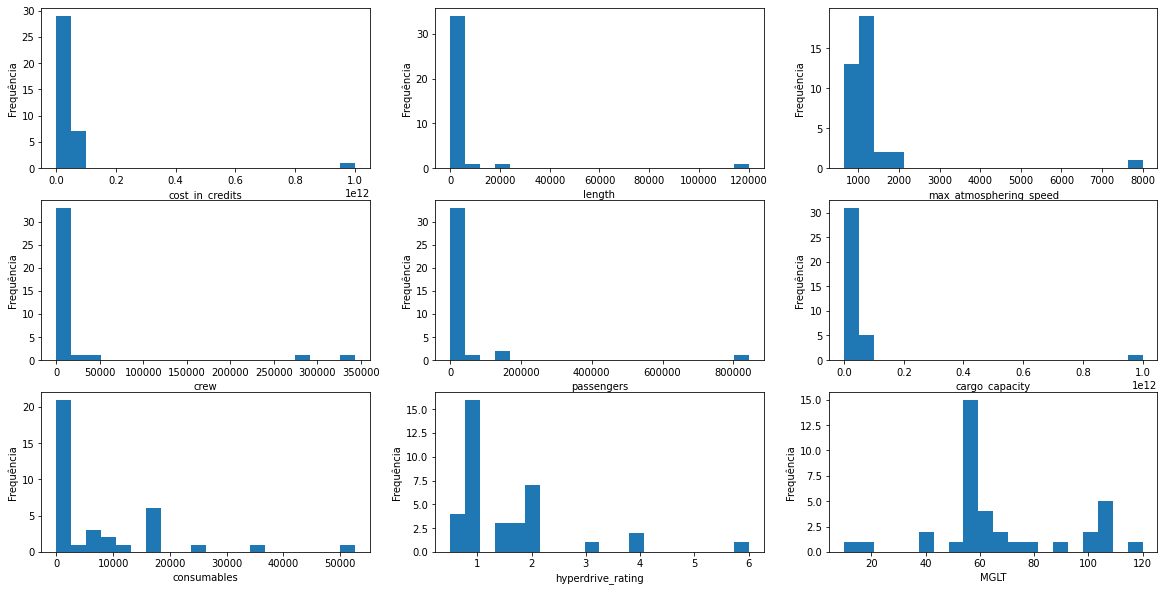

In [ ]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df_starships_raw.select_dtypes(include='number')[contColNames[counter]], bins=20)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

> Box-plot das variáveis numéricas

In [ ]:
contColNames = list(df_starships_raw.select_dtypes(include='number').columns) #-> seleciona apenas colunas numéricas
ncols = 3 #-> número de colunas que armazenarão os plots na figure 
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #-> número de linhas que armazenarão os plots na figure 

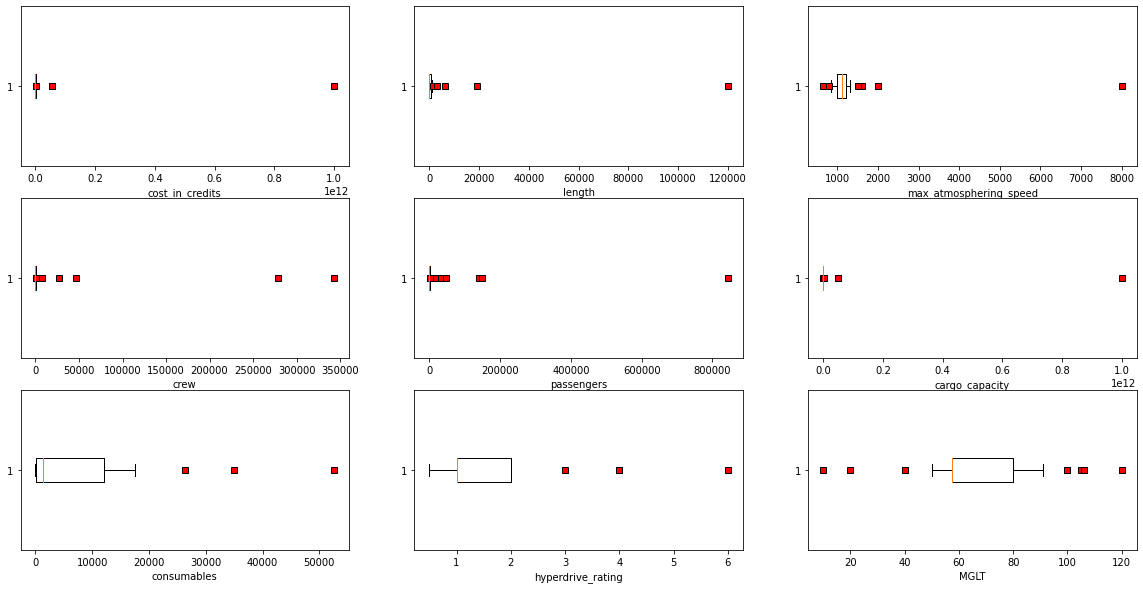

In [ ]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):
      red_square = dict(markerfacecolor='r', marker='s')
      ax.boxplot(df_starships_raw.select_dtypes(include='number')[contColNames[counter]], flierprops=red_square, vert=False, whis=0.75)
      ax.set_xlabel(contColNames[counter])
    else:
      ax.set_axis_off()

    counter += 1

plt.show()

Uma boa técnica de Data Science, além do tratamento dos nulos, é a decisão sobre o que fazer com a distribuição no que diz respeito aos outliers. Alguns modelos podem perder resolução devido à concentração destes pontos, enquanto outros necessitam disso para reconhecer os padrões (como por exemplo as redes neurais com modelagens sobre 'Anomaly Detection').

No nosso caso, por se tratar de 'espaçonaves' (fictícias, mas que podem ser comparadas analogamente a um projeto aeroespacial), não se tem muito o que fazer, uma vez que é a característica do projeto. Então as duas possibilidades poderiam ser: (1) remover outliers e manter os valores dentro intervalo do Z-score, ou (2) manter os outliers. Deste modo daremos continuidade das análises mantendo todos os pontos

---
#### Data Correlation
---

In [ ]:
df_starships_raw.corr()

,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT
cost_in_credits,1.000000,0.979468,-0.032026,0.751349,0.968491,0.991452,0.275456,0.400616,-0.428565
length,0.979468,1.000000,-0.022538,0.851271,0.966528,0.982299,0.384408,0.375800,-0.428407
max_atmosphering_speed,-0.032026,-0.022538,1.000000,-0.031671,-0.026113,-0.017457,-0.109200,-0.162523,-0.048783
crew,0.751349,0.851271,-0.031671,1.000000,0.760366,0.756833,0.652887,0.334175,-0.439808
passengers,0.968491,0.966528,-0.026113,0.760366,1.000000,0.963882,0.356662,0.355805,-0.424430
cargo_capacity,0.991452,0.982299,-0.017457,0.756833,0.963882,1.000000,0.279866,0.361334,-0.408702
consumables,0.275456,0.384408,-0.109200,0.652887,0.356662,0.279866,1.000000,0.130579,-0.506419
hyperdrive_rating,0.400616,0.375800,-0.162523,0.334175,0.355805,0.361334,0.130579,1.000000,-0.211726
MGLT,-0.428565,-0.428407,-0.048783,-0.439808,-0.424430,-0.408702,-0.506419,-0.211726,1.000000


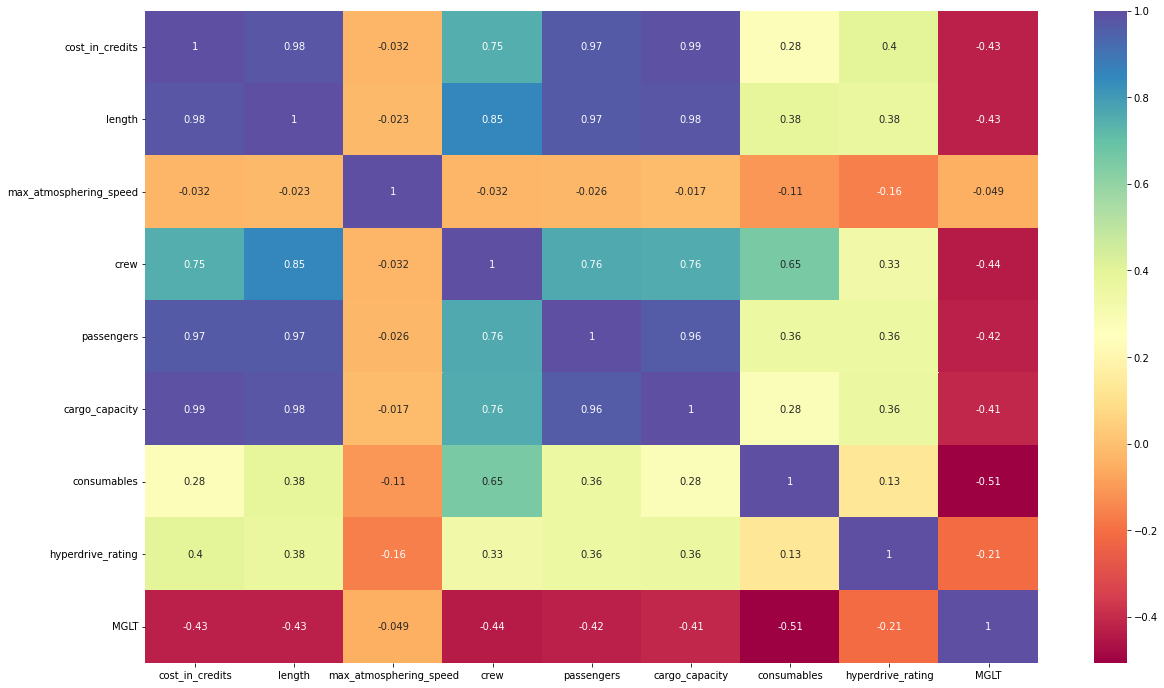

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_starships_raw.corr(), annot=True, cmap='Spectral')

<Figure size 1440x864 with 0 Axes>

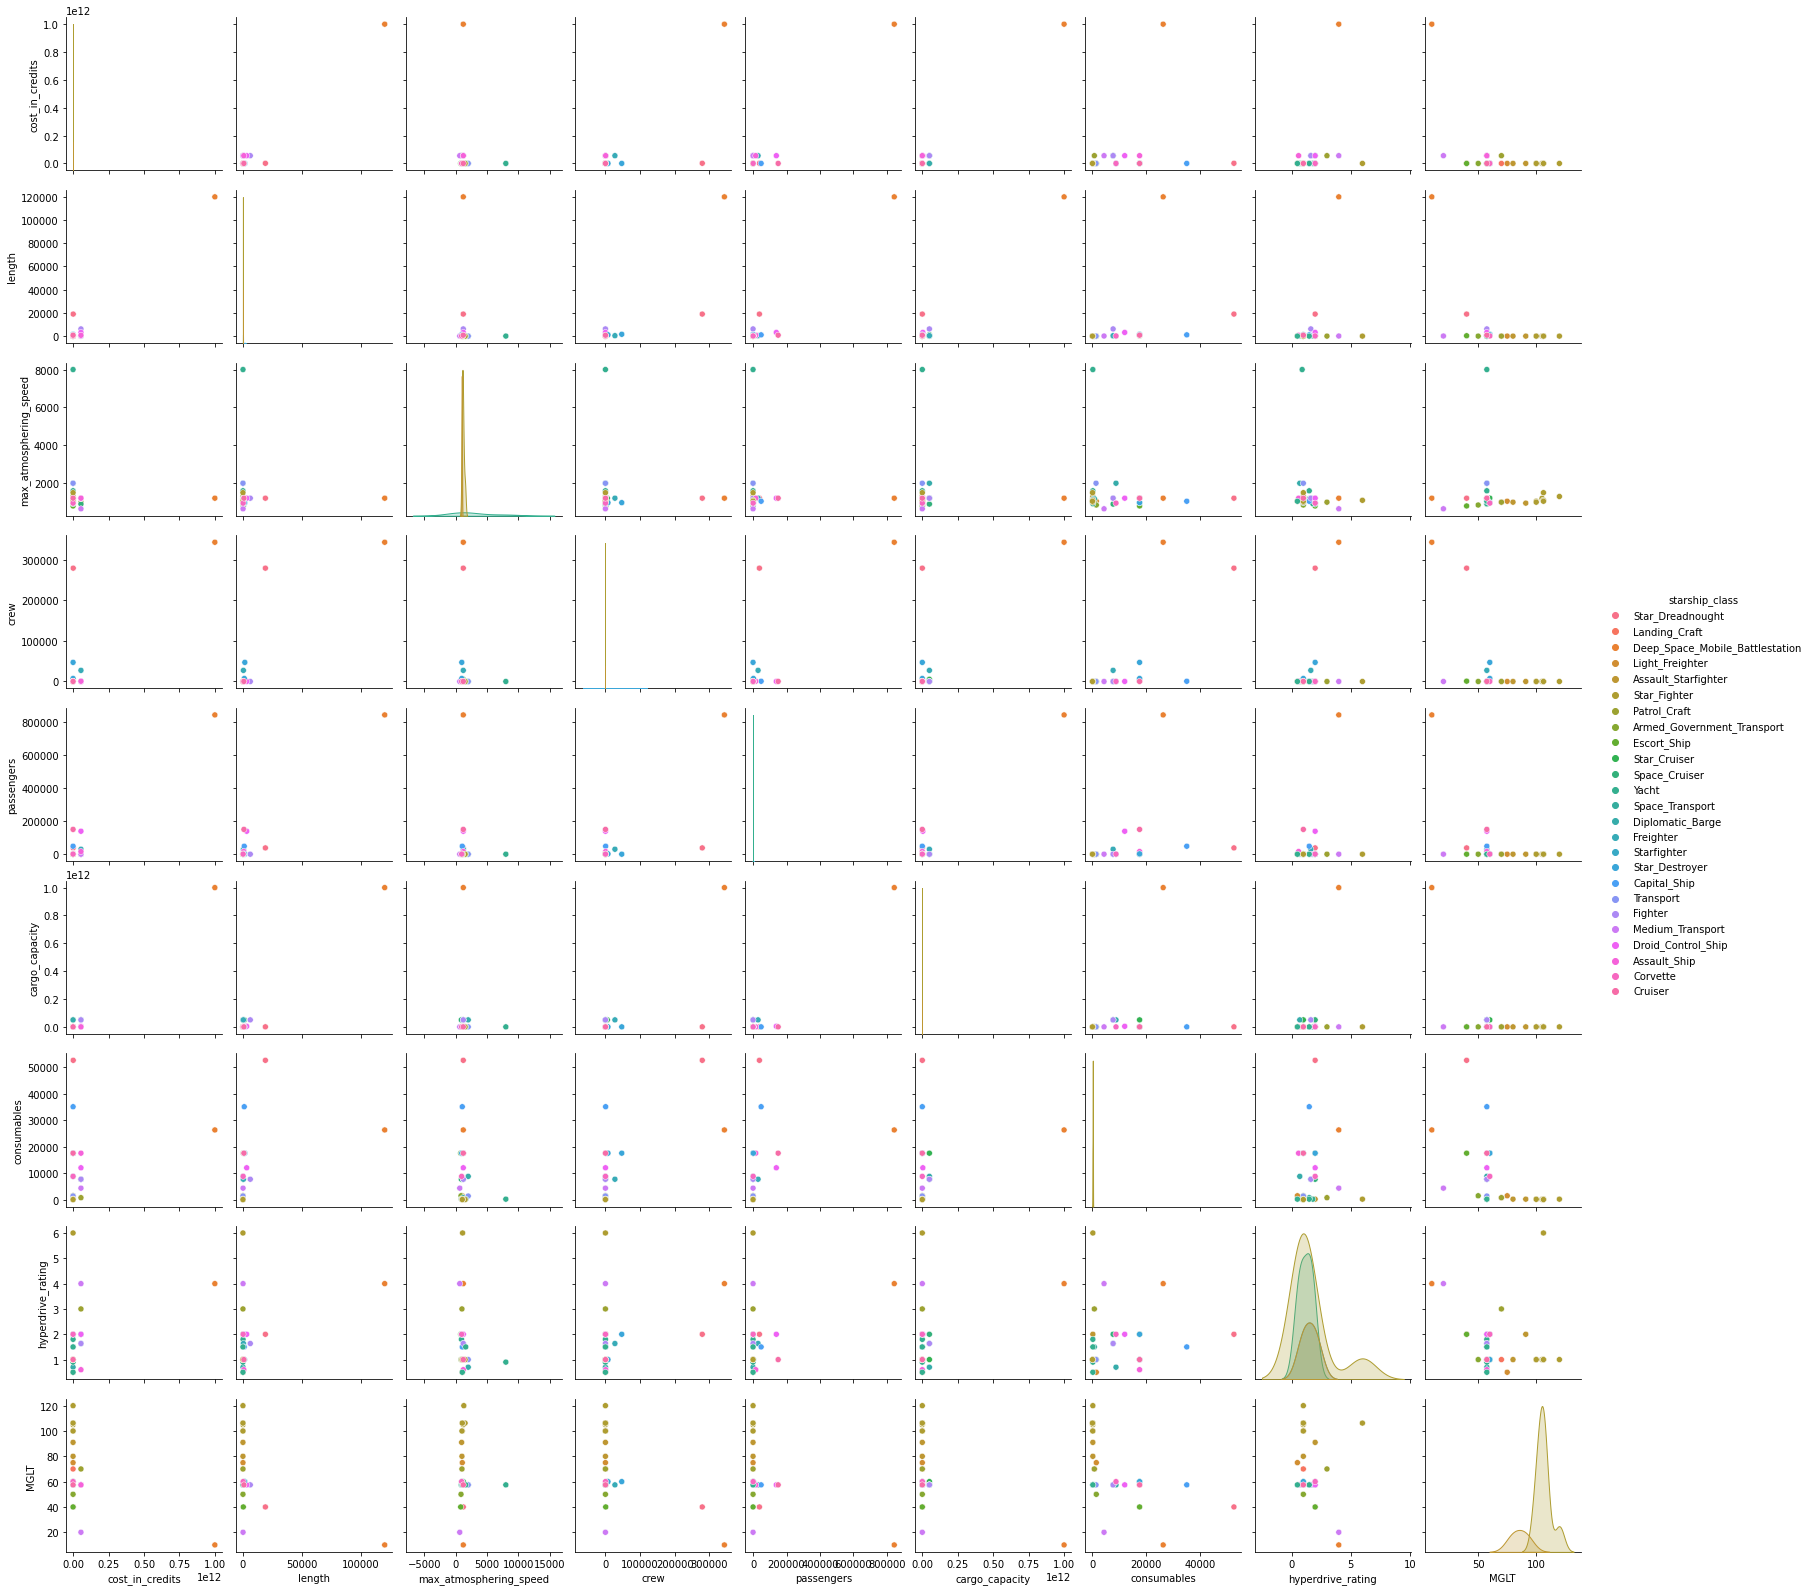

In [ ]:
plt.figure(figsize=(20,12))
sns.pairplot(df_starships_raw, hue='starship_class')

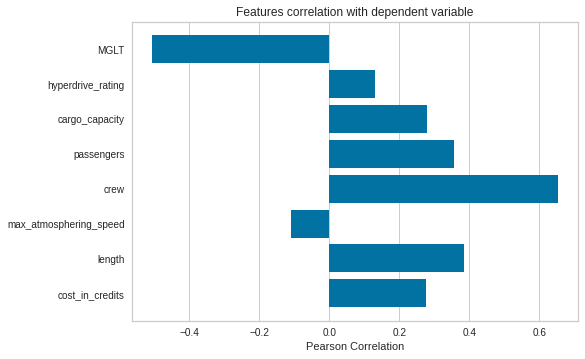

In [ ]:
from yellowbrick.target import FeatureCorrelation #doc: https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html

#Visualizador de correlacao com o target
features = list(df_starships_raw.select_dtypes(include='number').drop(['consumables'], axis=1).columns)
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(df_starships_raw.select_dtypes(include='number').drop(['consumables'], axis=1), df_starships_raw.consumables)        
visualizer.show()           

É válido ressaltar que algumas correlações apresentaram valores bem altos. Isso talvez gere uma inflação dos regressores (o já mencionado problema da multicolinearidade). Mas para tratá-los devemos fazer todo o preparo do nosso DF antes de inserí-lo no modelo de ML.

## e) Vehicles

### (i) Loading Dataset (raw)

In [ ]:
url_vehicles = 'https://raw.githubusercontent.com/JoaoCioffi/Kagglin/main/StarWars/vehicles.csv'
df_vehicles_raw = pd.read_csv(url_vehicles, sep=';')
df_vehicles_raw.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000.0,36.8,30.0,46,30.0,50000.0,2 months,wheeled
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500.0,10.4,1200.0,1,1.0,50.0,0,repulsorcraft
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550.0,3.4,250.0,1,1.0,5.0,NaN,repulsorcraft
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,NaN,6.4,1200.0,1,0.0,65.0,2 days,starfighter
4,Snowspeeder,t-47 airspeeder,Incom corporation,NaN,4.5,650.0,2,0.0,10.0,NaN,airspeeder


In [ ]:
df_vehicles_raw.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 39
|   X
|  Columns: 11
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


# 3- Machine Learning: creating a prediction model

> Metric:
>> Reason to measure the model using ‘rsquared’ value:
- To evaluate the performance of our model we will be using the ‘rsquared’ metric. Here we are dealing with a typical Regression problem;
- The reason we will be using the ‘rsquared’ value as a metric to evaluate the performance of our Linear Regression model is because it gives a good statistical measure of how the data are to the fitted regression line. Higher the rsquared value, the better the model fits your data, in other words, higher the value of rsquared value, the better the model perform in prediction;
- In short, we can say that since it is a Regression problem, i wanted an evaluation metric for my model which can tell me about the difference between observed and the fitted values;
- Rsquared gives us the percentage of the dependant variable variation that the linear model explains and is given by the following equation:

>>> 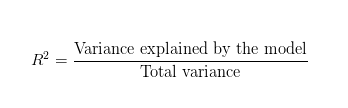

>> - Rsquared values vary between 0% to 100% with 0% showing that the model explains no variation in the response variable and 100% showing that the model successfully explains all the variations in the response variable.


> Specific Libraries: May include the previous ones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import patsy as pt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para este exemplo iremos aproveitar o dataset final da etapa sobre os dados de espaçonaves (df_starships_raw). Como todos os nulos foram previamente tratados, apenas faremos uma cópia. Para estruturar, temos:
- X: matriz das variáveis independentes;
- y: matriz resposta do modelo

In [ ]:
df_Final_raw = df_starships_raw.copy()
df_Final_raw.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,Kuat Drive Yards,1.143350e+09,19000.00,1210.882353,279144.0,38000.0,2.500000e+08,52560.0,2.0,40.0,Star_Dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,Sienar Fleet Systems,2.400000e+05,38.00,1000.000000,5.0,75.0,1.800000e+05,720.0,1.0,70.0,Landing_Craft
2,Death Star,DS-1 Orbital Battle Station,Sienar Fleet Systems,1.000000e+12,120000.00,1210.882353,342953.0,843342.0,1.000000e+12,26280.0,4.0,10.0,Deep_Space_Mobile_Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,1.000000e+05,34.37,1050.000000,4.0,6.0,1.000000e+05,1440.0,0.5,75.0,Light_Freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,1.349990e+05,14.00,1000.000000,2.0,0.0,1.100000e+02,168.0,1.0,80.0,Assault_Starfighter


In [ ]:
df_Final_raw.shape

(37, 13)

In [ ]:
df_Final_raw.isna().sum()

name                      0
model                     0
manufacturer              0
cost_in_credits           0
length                    0
max_atmosphering_speed    0
crew                      0
passengers                0
cargo_capacity            0
consumables               0
hyperdrive_rating         0
MGLT                      0
starship_class            0
dtype: int64

## a) Treatment of variables (scalling and normality tests)


No geral, como temos variáveis categóricas, poderíamos aplicar o processo de One-Hot Encoding nos campos 'manufacturer' e 'starship_class' através do get_dummies(). Entretanto, ao observarmos o Metadata vemos que existem muitas variações (isso talvez exigiria modelos mais robustos, pois aumentaria consideravelmente a quantidade de colunas). Como queremos um modelo de Machine Learning que faça predições de uma forma mais direta, trabalharemos apenas com os valores numéricos.

Neste caso em específicos, atribuiremos a X o conjunto ***('cost_in_credits','length', 'max_atmosphering_speed','crew','passengers','cargo_capacity', 'hyperdrive_rating','MGLT')*** e a y, que é nossa variável target, passaremos os valores de consumíveis ***('consumables')*** a ser previsto de acordo com as relações e combinações anteriores. Consideremos para fins de simplificação que cada modelo de espaçonave está com a carga máxima e com toda a tripulação definida, incluindo seus passageiros

É válido mencionar que esta é apenas uma ideia inicial de quais variáveis seriam repassadas para o ajuste do modelo. Caso haja algum problema de multicolinearidade nossos critérios devem ser mais minusciosos afim de excluir colunas que contribuam para isso

### (i) Separando em resposta (y) e variáveis independentes (X)

---
#### Selecionando X
---

In [ ]:
X = df_Final_raw.pipe(select_columns, ['cost_in_credits','length','max_atmosphering_speed',
                                       'crew','passengers','cargo_capacity','hyperdrive_rating','MGLT'])
X.head()

,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,hyperdrive_rating,MGLT
0,1.143350e+09,19000.00,1210.882353,279144.0,38000.0,2.500000e+08,2.0,40.0
1,2.400000e+05,38.00,1000.000000,5.0,75.0,1.800000e+05,1.0,70.0
2,1.000000e+12,120000.00,1210.882353,342953.0,843342.0,1.000000e+12,4.0,10.0
3,1.000000e+05,34.37,1050.000000,4.0,6.0,1.000000e+05,0.5,75.0
4,1.349990e+05,14.00,1000.000000,2.0,0.0,1.100000e+02,1.0,80.0


> Aplicando o escalonamento dos dados

In [ ]:
xNorm = X.pipe(feat_scale)
xNorm.head()

,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,hyperdrive_rating,MGLT
0,-0.222173,0.744869,-0.098624,3.626644,0.026336,-0.205200,0.371714,-1.108001
1,-0.229140,-0.211382,-0.280357,-0.268498,-0.242869,-0.206722,-0.531308,0.100567
2,5.864932,5.838284,-0.098624,4.517043,5.742936,5.885286,2.177759,-2.316569
3,-0.229140,-0.211566,-0.237269,-0.268512,-0.243358,-0.206723,-0.982820,0.301995
4,-0.229140,-0.212593,-0.280357,-0.268540,-0.243401,-0.206723,-0.531308,0.503423


---
#### Selecionando y
---

In [ ]:
y = df_Final_raw.pipe(select_columns, ['consumables'])
y.head()

,consumables
0,52560.0
1,720.0
2,26280.0
3,1440.0
4,168.0


> Testes de normalidade (Kolmogorov) e tratamento da resposta

>> * Resposta original

In [ ]:
# Teste de Kolmogorov
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Estatística do teste: {kStat}\nP-Value: {kPvalue}')

Estatística do teste: 1.0
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


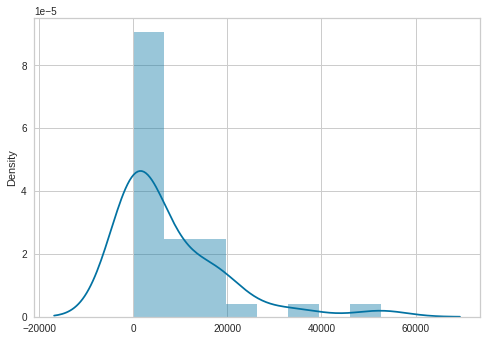

In [ ]:
fig = plt.figure()
sns.distplot(y)

>> * Teste log(y)

In [ ]:
# Teste de Kolmogorov
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Estatística do teste: {kStat}\nP-Value: {kPvalue}')

Estatística do teste: 1.0
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


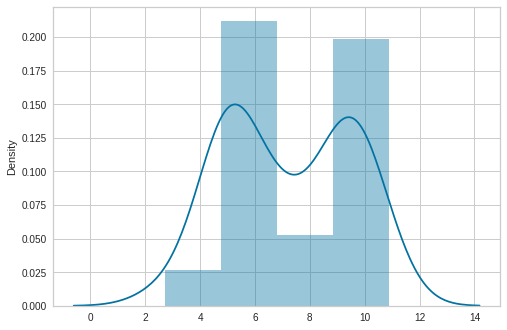

In [ ]:
fig = plt.figure()
sns.distplot(np.log(y))

>> * Teste inverso (1/y)

In [ ]:
# Teste de Kolmogorov
kStat, kPvalue = sp.stats.kstest(rvs=1/y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Estatística do teste: {kStat}\nP-Value: {kPvalue}')

Estatística do teste: 0.5265764643003651
P-Value: 4.3377694286586814e-10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


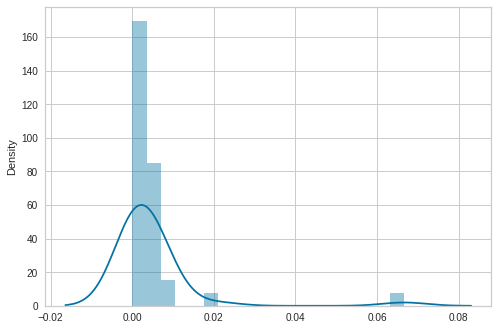

In [ ]:
fig = plt.figure()
sns.distplot(1/y)

>> * Teste sqrt(y)

In [ ]:
# Teste de Kolmogorov
kStat, kPvalue = sp.stats.kstest(rvs=np.sqrt(y), cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Estatística do teste: {kStat}\nP-Value: {kPvalue}')

Estatística do teste: 1.0
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


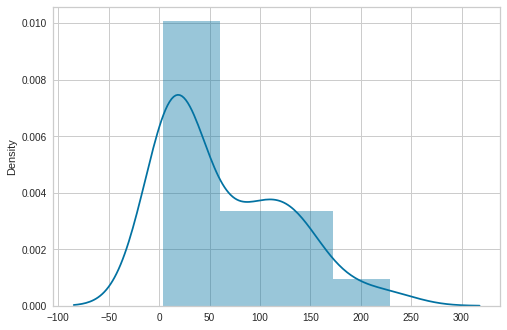

In [ ]:
fig = plt.figure()
sns.distplot(np.sqrt(y))

>> * Box-Cox Transformation

In [ ]:
posdata = y[y > 0] # Find the optimal Box-Cox transformation, and verify that λ is positive. This work-around doesn't work if λ ≤ 0.

yBx = sp.stats.boxcox(posdata['consumables'], alpha = 0.01) # alpha = 0.01 for 99% of confidence

print('Optimal Box-Cox Transformation: ', yBx[1])
print('Confidence Interval (99%): ', yBx[2])

Optimal Box-Cox Transformation:  0.006482603471032035
Confidence Interval (99%):  (-0.21454850648076093, 0.2411158604357136)


Com esses resultados existem duas possibilidades de melhorar o resultado: (1) usar o valor do lambda ótimo, de aprox. 0.006, ou (2) usar um valor que esteja dentro do intervalo de confiança. Neste caso, ambos '0' e '0.5' estão no intervalo. O valor nulo equivale ao logaritmo natural (que já foi testado) e o valor '0.5' representa a raiz quadrada da resposta

In [ ]:
lambda_bx = yBx[1]

# Teste de Kolmogorov
kStat, kPvalue = sp.stats.kstest(rvs=(y**lambda_bx), cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Estatística do teste: {kStat}\nP-Value: {kPvalue}')

Estatística do teste: 0.8583657803923015
P-Value: 8.708994418955962e-32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


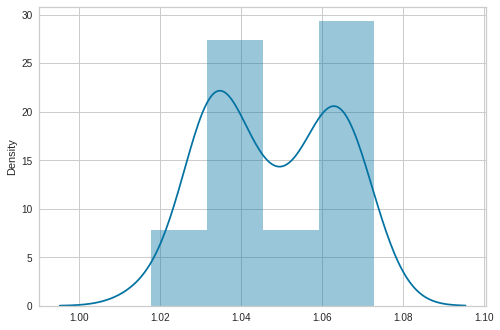

In [ ]:
fig = plt.figure()
sns.distplot(y**lambda_bx)

### (ii) Montando a matriz geral do modelo

In [ ]:
df_geral = pd.concat([y.reset_index(drop=True), xNorm], axis = 1) #une y com xNorm
df_geral.head()

,consumables,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,hyperdrive_rating,MGLT
0,52560.0,-0.222173,0.744869,-0.098624,3.626644,0.026336,-0.205200,0.371714,-1.108001
1,720.0,-0.229140,-0.211382,-0.280357,-0.268498,-0.242869,-0.206722,-0.531308,0.100567
2,26280.0,5.864932,5.838284,-0.098624,4.517043,5.742936,5.885286,2.177759,-2.316569
3,1440.0,-0.229140,-0.211566,-0.237269,-0.268512,-0.243358,-0.206723,-0.982820,0.301995
4,168.0,-0.229140,-0.212593,-0.280357,-0.268540,-0.243401,-0.206723,-0.531308,0.503423


---
#### Análise VIF (Variance Inflation Factor) e de Resíduos
---

> * VIF

In [ ]:
# Variance of Inflation

pd.DataFrame({
            'variables': X_train.columns[1:],
            'VIF': [variance_inflation_factor(X_train.values, i+1) for i in range(len(X_train.columns[1:]))]
            })

,variables,VIF
0,length,20.591273
1,max_atmosphering_speed,1.826369
2,crew,13.287777
3,passengers,1.732054
4,cargo_capacity,7.251682
5,hyperdrive_rating,1.392899
6,MGLT,1.265920


## e) Random Forest Regression

In [ ]:
# X_train, X_test, y_train, y_test = split_train_test(xNorm, y, perc=0.1)

y = df_geral.consumables
y = np.log(y)
y = y.values

X = df_geral.drop(['consumables'], axis=1)

from sklearn.model_selection import train_test_split
# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27, 8)
(10, 8)
(27,)
(10,)


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(1, 21), "criterion": ["mse", "mae"], 'random_state':range(0,51)}
reg_RandFor = RandomForestRegressor()

grd = GridSearchCV(reg_RandFor, parameters, scoring="neg_mean_absolute_error")
grd.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 21),
                         'random_state': range(0, 51)},
             scoring='neg_mean_absolute_error')

In [ ]:
grd.cv_results_

{'mean_fit_time': array([0.11966801, 0.12200298, 0.11911492, ..., 0.1348599 , 0.13866258,
        0.13091722]),
 'mean_score_time': array([0.00957532, 0.01035314, 0.00966654, ..., 0.00985932, 0.00975699,
        0.00999684]),
 'mean_test_score': array([-0.76686526, -0.76271642, -0.7474667 , ..., -0.70273629,
        -0.64384114, -0.71628072]),
 'param_criterion': masked_array(data=['mse', 'mse', 'mse', ..., 'mae', 'mae', 'mae'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 20, 20, 20],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 1, 2, ..., 48, 49, 50],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'mse', 'max_depth': 1, 'random_state': 0},
  {

In [ ]:
grd.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=2, random_state=49)

In [ ]:
y_pred = grd.predict(X_test)

from sklearn import metrics
# Calcular as métricas do modelo
print("MAE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred, squared=True)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MAE: 0.571326179087284
RMSE: 0.532417974566299
R²: 0.8478973707776012


> * Resíduos

In [ ]:
pred_DF = pd.DataFrame({'consumables_true' : y_test,
                        'consumables_pred' : y_pred,
                        'residuals' : y_test - y_pred})
pred_DF

,consumables_true,consumables_pred,residuals
0,4.787492,5.013839,-0.226348
1,9.392662,9.852255,-0.459593
2,9.771098,9.654536,0.116562
3,5.123964,4.920976,0.202988
4,6.579251,7.366381,-0.787130
5,9.771098,9.860580,-0.089482
6,7.272398,6.099009,1.173389
7,6.579251,6.335428,0.243823
8,9.771098,8.442698,1.328401
9,8.947351,7.861805,1.085545


> * Homocedasticity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Residuals for Consumables')

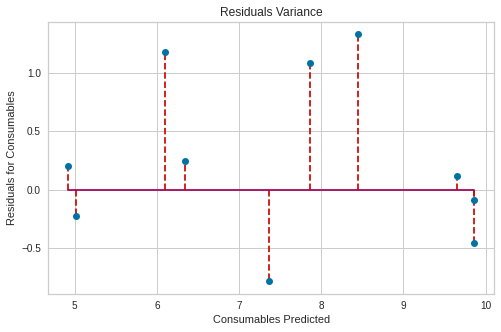

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
plt.stem(pred_DF.consumables_pred, pred_DF.residuals,'--r')
ax.set_title('Residuals Variance')
ax.set_xlabel('Consumables Predicted')
ax.set_ylabel('Residuals for Consumables')